# **LOAN DEFAULT PREDICTION**

**Problem Definition**<br>
**The context:** A major proportion of retail bank profit comes from interests in the form of home loans. These loans are borrowed by regular income/ high-earning customers. Banks are most fearful of defaulters, as bad loans (NPA) usually eat up a major chunk of their profits. Therefore, it is important for banks to be judicious while approving loans for their customer base. The approval process for the loans is multifaceted. Through this process, the bank tries to check the credit worthiness of the applicant based on a manual study of various aspects of the application. 
The entire process is not only effort-intensive but also prone to wrong judgment/approval owing to human error and biases. There have been attempts by many banks to automate this process by using heuristics. But with the advent of data science and machine learning, the focus has shifted to building machines that can learn this approval process and make it free of biases and more efficient. At the same time, one important thing to keep in mind is to make sure that the machine does not learn the biases that previously crept in because of the human approval process.
<br>

**The objectives:** 
•	Build a classification model to predict clients who are likely to default on their loans.<br>
•	Provide recommendations to the important features to consider while approving a loan<br>
<br>

**The key questions:** 
What is more important –<br> 
•	Predicting an applicant will default, when in reality the applicant does default resulting in loss of a potential customer<br>
•	Predicting an applicant will not default, but ends up defaulting resulting in bad loans and loss of revenue
<br>

**The problem formulation:** We are trying to develop a binary classification model to maximize the predictive capability of identifying defaulters based on the understanding of the past applicant’s profile while avoiding or circumventing the biases that had crept in during the human approval process to in turn minimize the risk of future loan defaults.<br>

## **Data Description:**
The Home Equity dataset (HMEQ) contains baseline and loan performance information for 5,960 recent home equity loans. The target (BAD) is a binary variable that indicates whether an applicant has ultimately defaulted or has been severely delinquent. This adverse outcome occurred in 1,189 cases (20 percent). 12 input variables were registered for each applicant.


* **BAD:** 1 = Client defaulted on loan, 0 = loan repaid

* **LOAN:** Amount of loan approved.

* **MORTDUE:** Amount due on the existing mortgage.

* **VALUE:** Current value of the property. 

* **REASON:** Reason for the loan request. (HomeImp = home improvement, DebtCon= debt consolidation which means taking out a new loan to pay off other liabilities and consumer debts) 

* **JOB:** The type of job that loan applicant has such as manager, self, etc.

* **YOJ:** Years at present job.

* **DEROG:** Number of major derogatory reports (which indicates a serious delinquency or late payments). 

* **DELINQ:** Number of delinquent credit lines (a line of credit becomes delinquent when a borrower does not make the minimum required payments 30 to 60 days past the day on which the payments were due). 

* **CLAGE:** Age of the oldest credit line in months. 

* **NINQ:** Number of recent credit inquiries. 

* **CLNO:** Number of existing credit lines.

* **DEBTINC:** Debt-to-income ratio (all your monthly debt payments divided by your gross monthly income. This number is one way lenders measure your ability to manage the monthly payments to repay the money you plan to borrow.

### **Import the necessary libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold

from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,precision_score,recall_score,f1_score,precision_recall_curve
from sklearn.metrics import roc_auc_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import VarianceThreshold, RFE
from xgboost import XGBClassifier

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE,ADASYN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN,SMOTETomek

import scipy.stats as stats

from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

### **Read the dataset**

In [2]:
hm=pd.read_csv("hmeq.csv")

In [3]:
# Copying data to another variable to avoid any changes to original data
data=hm.copy()
data_1= hm.copy()

### **Print the first and last 5 rows of the dataset**

In [4]:
# Display first five rows
data.head(5)

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [5]:
# Display last 5 rows
data.tail(5)

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
5955,0,88900,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347
5956,0,89000,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971
5957,0,89200,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590
5958,0,89800,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882
5959,0,89900,48811.0,88934.0,DebtCon,Other,15.0,0.0,0.0,219.601002,0.0,16.0,34.571519


### **Understand the shape of the dataset**

In [6]:
# Check the shape of the data
data.shape

(5960, 13)

**Insights**<br>
The data has 13 columns and 5960 rows of data.

### **Check the data types of the columns**

In [7]:
# Check info of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


**Insights**<br>
All the columns except 'bad' and 'loan' have null values. The columns 'reason' and 'job' have object data types.The data type for columns 'bad' and 'loan' is int64  and all the other columns have float64 data type.

In [8]:
#Check for Duplicates
duplicate = data[data.duplicated()]
duplicate.shape

(0, 13)

**There are no duplicate values in the sample dataset**

### **Check for missing values**

In [9]:
# Analyse missing values
data.isnull().sum()

BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64

In [10]:
# Check the percentage of missing values in the each column.
((data.isnull().sum()/len(data))*100).round(2)

BAD         0.00
LOAN        0.00
MORTDUE     8.69
VALUE       1.88
REASON      4.23
JOB         4.68
YOJ         8.64
DEROG      11.88
DELINQ      9.73
CLAGE       5.17
NINQ        8.56
CLNO        3.72
DEBTINC    21.26
dtype: float64

# **Insights**<br>
All the columns except bad and loan have missing values. The percentage of missing values gives us a better idea of the about the missing values in a column than absolute count. The Debtinc has 21 percent missing values(1260 observations). The debtinc column provides the debt to income ratio which would be an important feature in deciding if the applicant would default. Just replacing the missing values with the median value might lead to incorrect analysis as more than 1/5th of the observations are missing. Adding a missing flag and then replacing the value would be a better course of action than just replacing the missing values with the median value or dropping the rows.

**We can convert the object type columns to categories**

`converting "objects" to "category" reduces the data space required to store the dataframe`

### **Convert the data types**

In [11]:
cols = data.select_dtypes(['object']).columns.tolist()

#adding target variable to this list as this is an classification problem and the target variable is categorical

cols.append('BAD')

In [12]:
cols

['REASON', 'JOB', 'BAD']

In [13]:
# Changing the data type of object type column to category. hint use astype() function
for i in cols:
    data[i] = data[i].astype("category")

In [14]:
# Checking the info again and the datatype of different variable
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   BAD      5960 non-null   category
 1   LOAN     5960 non-null   int64   
 2   MORTDUE  5442 non-null   float64 
 3   VALUE    5848 non-null   float64 
 4   REASON   5708 non-null   category
 5   JOB      5681 non-null   category
 6   YOJ      5445 non-null   float64 
 7   DEROG    5252 non-null   float64 
 8   DELINQ   5380 non-null   float64 
 9   CLAGE    5652 non-null   float64 
 10  NINQ     5450 non-null   float64 
 11  CLNO     5738 non-null   float64 
 12  DEBTINC  4693 non-null   float64 
dtypes: category(3), float64(9), int64(1)
memory usage: 483.7 KB


### **Analyze Summary Statistics of the dataset**

In [15]:
# Analyze the summary statistics for numerical variables
data.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
LOAN,5960.0,18607.97,11207.48,1100.00,11100.00,16300.00,23300.00,89900.00
MORTDUE,5442.0,73760.82,44457.61,2063.00,46276.00,65019.00,91488.00,399550.00
VALUE,5848.0,101776.05,57385.78,8000.00,66075.50,89235.50,119824.25,855909.00
YOJ,5445.0,8.92,7.57,0.00,3.00,7.00,13.00,41.00
DEROG,5252.0,0.25,0.85,0.00,0.00,0.00,0.00,10.00
DELINQ,5380.0,0.45,1.13,0.00,0.00,0.00,0.00,15.00
CLAGE,5652.0,179.77,85.81,0.00,115.12,173.47,231.56,1168.23
NINQ,5450.0,1.19,1.73,0.00,0.00,1.00,2.00,17.00
CLNO,5738.0,21.30,10.14,0.00,15.00,20.00,26.00,71.00
DEBTINC,4693.0,33.78,8.60,0.52,29.14,34.82,39.00,203.31


**Insights :**<br> All the numerical variables exhibit outliers.
The mean loan amount of the applicants' was $18,607 with a range from 11207 to 89900.<br>
The mortdue values have a median of 65019 and a high range of 2063 to 399550.<br>
The value of the property ranges between 57385 to 855,909 and a median of 89235.50.<br>
The years on the job has a median of 7 with a low of 0 and a max of 41.<br>
Derog clearly shows outliers with a median of 0 and a max value of 10. Delinq also has a median of 0 with a max value of 15<br>
The number of recent credit lines(clno) of the applicants ranged from 10 to 71 with a median of 20. The age of oldest credit line of the applicant ranged from 115 months to 1168 months with a mean of 179.<br>
The debt to income ratio of the applicant had a max value of 203.31 while the median value was 34.82.

In [16]:
#Check unique values in each column
data.nunique()

BAD           2
LOAN        540
MORTDUE    5053
VALUE      5381
REASON        2
JOB           6
YOJ          99
DEROG        11
DELINQ       14
CLAGE      5314
NINQ         16
CLNO         62
DEBTINC    4693
dtype: int64

In [17]:
# Check summary for categorical data
data.describe(include = ['category']).T

,count,unique,top,freq
BAD,5960,2,0,4771
REASON,5708,2,DebtCon,3928
JOB,5681,6,Other,2388


**Insights **<br>

The categorical variables BAD has 2 unique values with 0 being the most frequent.<br>
The variable Reason has 2 unique values with debtcon being more frequent -3928 observations our of 5708.<br>
The categorical variable job has 6 unique values with the 'other' being most frequent.

**Let's look at the unique values in all the categorical variables**

In [18]:
# Checking the count of unique values in each categorical column 

cols_cat= data.select_dtypes(['category'])

for i in cols_cat.columns:
    print('Unique values in',i, 'are :')
    print(data[i].value_counts())
    print('*'*40)
    print('Percentage of unique value in', i,'are:')
    print((data[i].value_counts(normalize = True)*100).round(2))
    print('*'*40)

Unique values in BAD are :
0    4771
1    1189
Name: BAD, dtype: int64
****************************************
Percentage of unique value in BAD are:
0    80.05
1    19.95
Name: BAD, dtype: float64
****************************************
Unique values in REASON are :
DebtCon    3928
HomeImp    1780
Name: REASON, dtype: int64
****************************************
Percentage of unique value in REASON are:
DebtCon    68.82
HomeImp    31.18
Name: REASON, dtype: float64
****************************************
Unique values in JOB are :
Other      2388
ProfExe    1276
Office      948
Mgr         767
Self        193
Sales       109
Name: JOB, dtype: int64
****************************************
Percentage of unique value in JOB are:
Other      42.03
ProfExe    22.46
Office     16.69
Mgr        13.50
Self        3.40
Sales       1.92
Name: JOB, dtype: float64
****************************************


# **Insights :**<br>
The percentage of defaulters/bad loans were 20.05 %. This is indicative of an imbalanced data.<br>
Debtcon was higher with 68.82% in comparsion to homeimp among the reasons for the loan.<br>
The 'other' job profile made up 44% of the jobs with profexe and office jobs at 22% & 16% respectively with sales being the least at 1.92%.

In [19]:
#Creating a dataframe with no null values
data_nonull= data.dropna()

# Checking the percentage of unique values in the bad column in the dataframe with no null values
data_nonull['BAD'].value_counts(normalize=True)

0    0.91082
1    0.08918
Name: BAD, dtype: float64

**Among the data with no null values Class 1 (defaulters) make up only 8 % of the dataset.**

In [20]:
# Creating a dataframe with all the rows with any null values
data_nulls = data[data.isnull().any(axis=1)]

# Checking the percentage of unique values in the bad column 
data_nulls['BAD'].value_counts(normalize=True)

0    0.65755
1    0.34245
Name: BAD, dtype: float64

In [21]:
data_1['EQUITY']= data_1['VALUE']-data['MORTDUE']# calculating Equity
data_EQ= data_1[data_1['EQUITY']<0] # creating a dataframe with only negative equity
data_EQ['BAD'].value_counts(normalize=True) # calulating the defaulters with negative equity

0    0.745098
1    0.254902
Name: BAD, dtype: float64

**In the dataframe created with all the rows with any null values, the bad loans/defaulters constituted about 34% indicating that there's a correlation between the applications with the missing values and the chance of the applicants defaulting.**

## **Exploratory Data Analysis (EDA) and Visualization**

## **Univariate Analysis**

Univariate analysis is used to explore each variable in a data set, separately. It looks at the range of values, as well as the central tendency of the values. It can be done for both numerical and categorical variables

### **1. Univariate Analysis - Numerical Data**
Histograms and box plots help to visualize and describe numerical data. We use box plot and histogram to analyze the numerical columns.

In [22]:
# Function to create a boxplot and histogram for any input numerical variable.
# This function takes the numerical column as the input and return the boxplots and histograms for the variable.

def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram
    

#### Using the above function, let's first analyze the Histogram and Boxplot for LOAN

Skew : 2.02


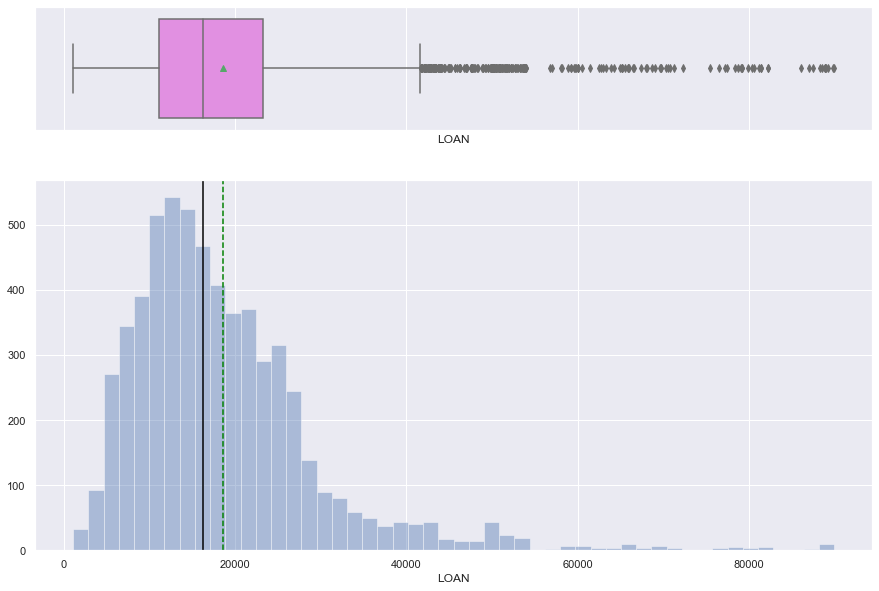

In [23]:
# Build the histogram boxplot for Loan

histogram_boxplot(data['LOAN'])
print('Skew :', round(data['LOAN'].skew(), 2))


**Insights __________**<br>
The distribution of loan is right skewed with a lot of outliers and the more than 50% of applicants having a loan amount less than 20,000.The average loan amount is higher than the median due to the pesence of outliers.

#### **Note:** As done above, analyze Histogram and Boxplot for other variables

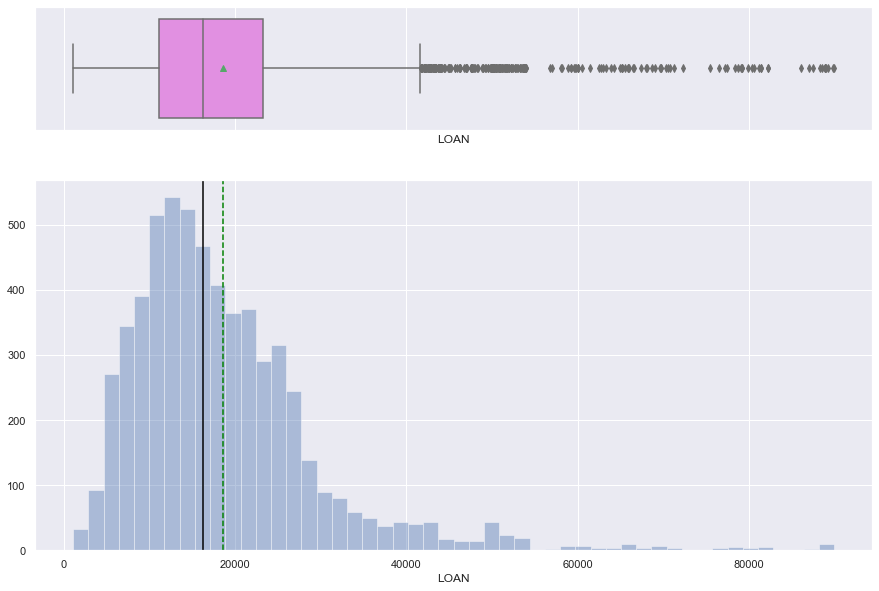

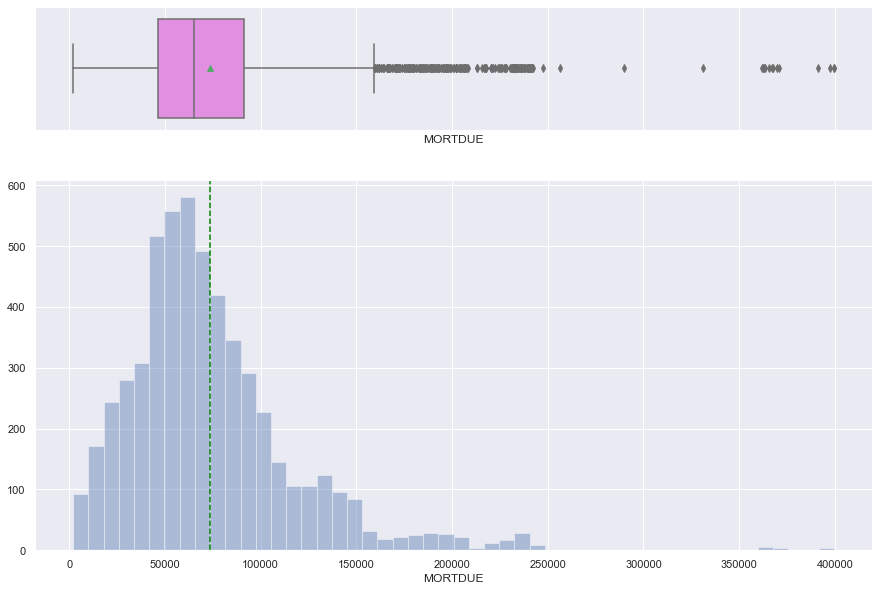

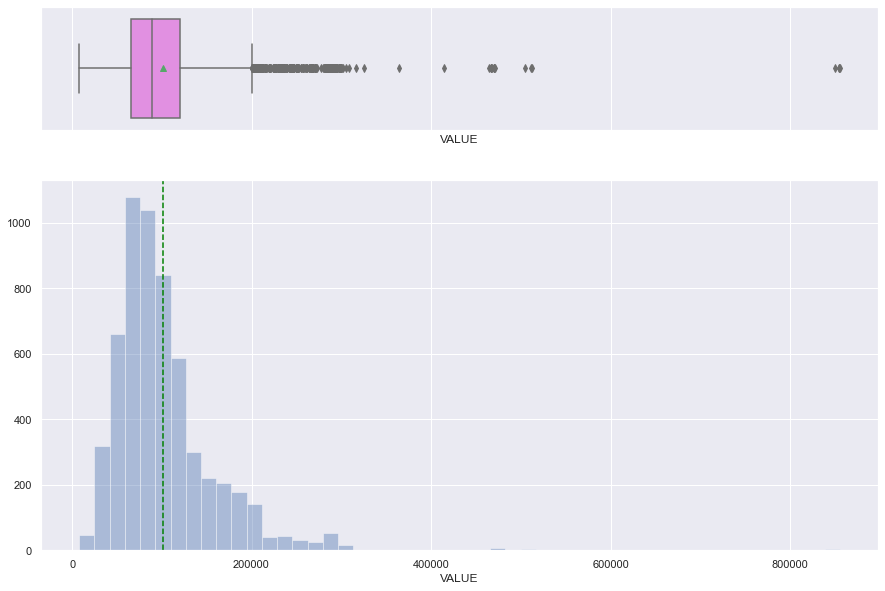

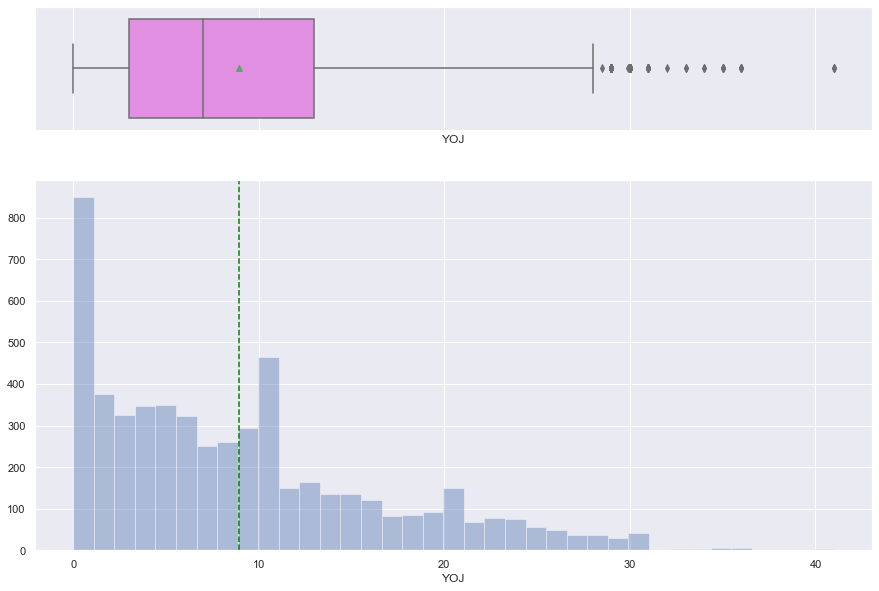

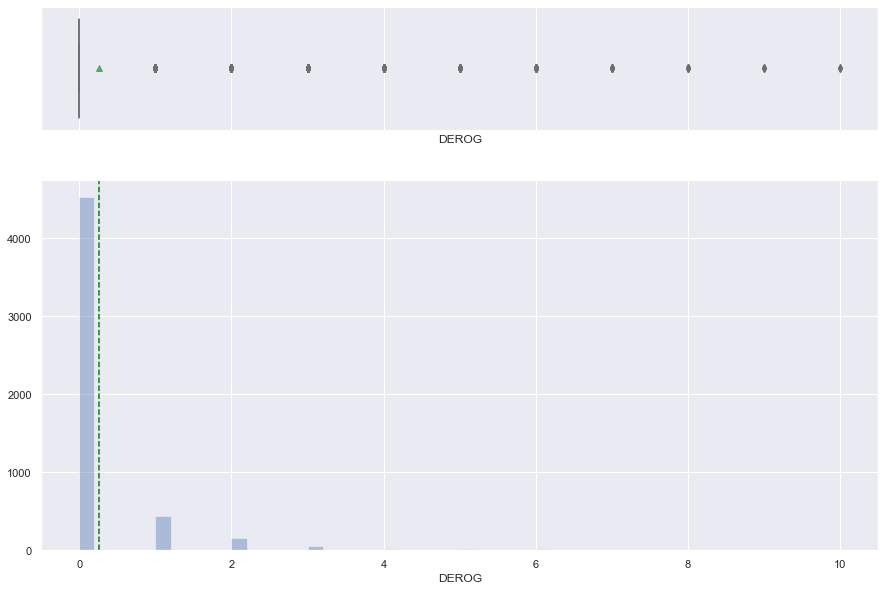

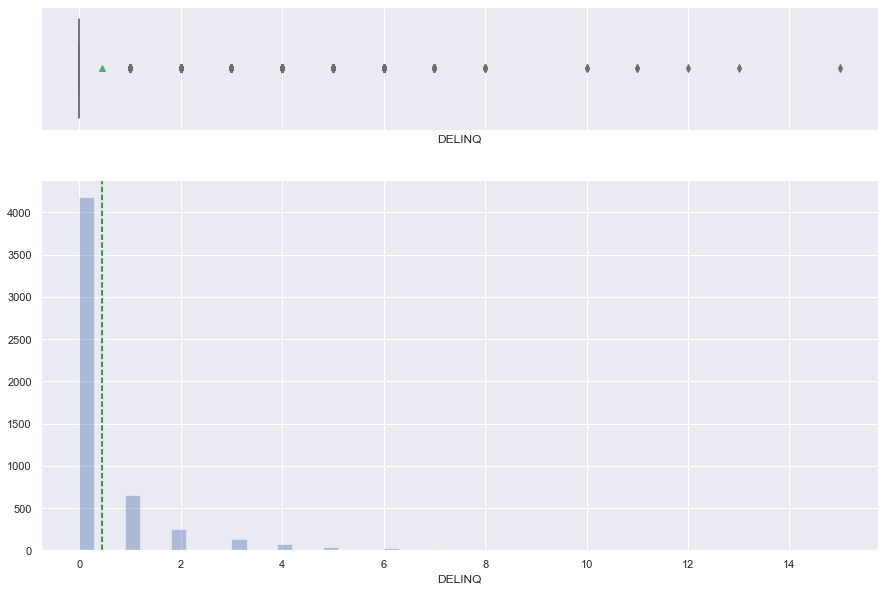

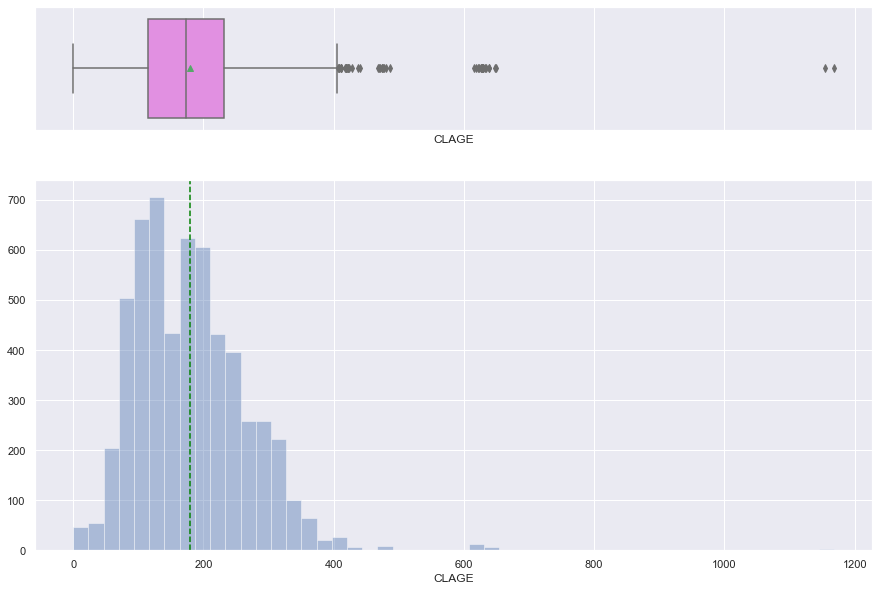

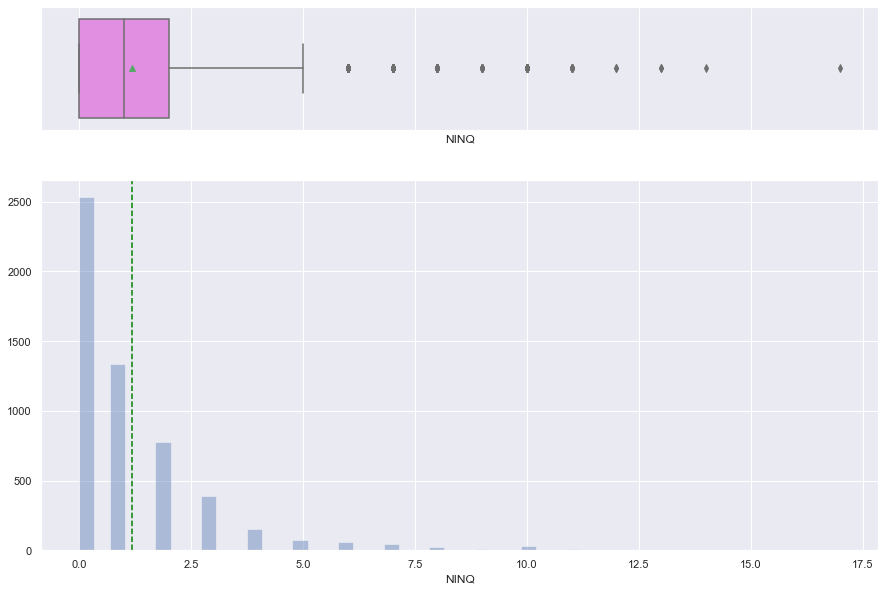

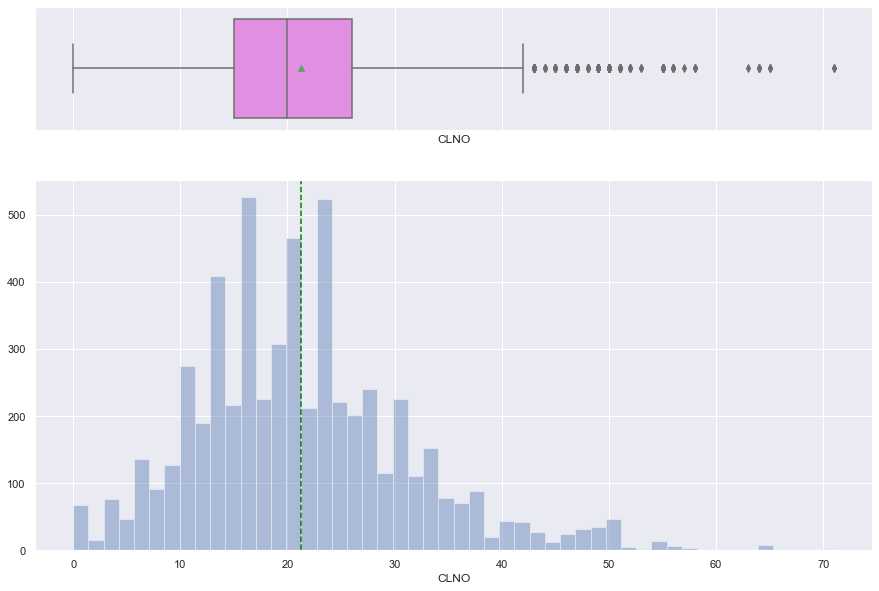

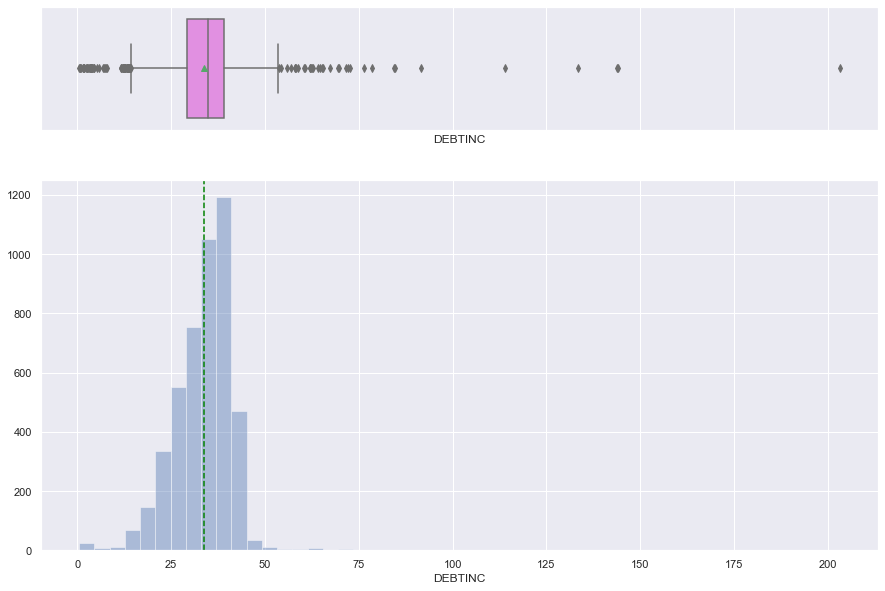

In [24]:
num_cols = data.select_dtypes('number')
for col in num_cols:
    histogram_boxplot(data[col])   

**Insights ____________**<br>
Most applicants had delinq, derog and ninq at 0.Majority of the applicants had years at job under 13 years. 75 % of the applicants have age of the oldest credit line in months under 231 months~19 years.

### **2. Univariate Analysis - Categorical Data**

In [25]:
# Function to create barplots that indicate percentage for each category.

def perc_on_bar(plot, feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''

    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # height of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percentage 
        
    plt.show() # show the plot

#### Analyze Barplot for DELINQ

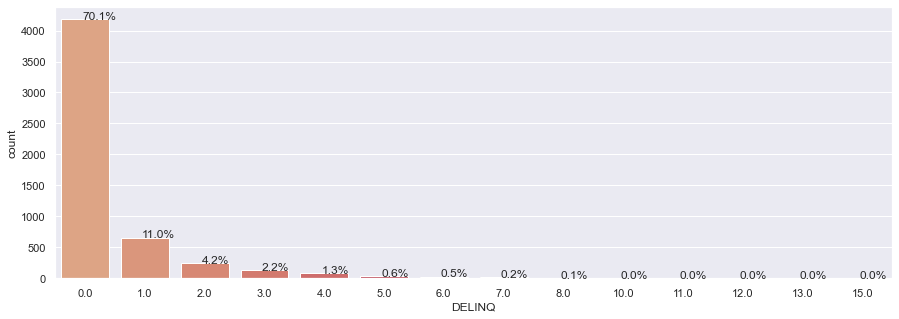

In [26]:
#Build barplot for DELINQ

plt.figure(figsize=(15,5))
ax = sns.countplot(data["DELINQ"],palette='flare')
perc_on_bar(ax,data["DELINQ"])

**Insights **<br>
70% of the applicants had 0 deliquent credit lines

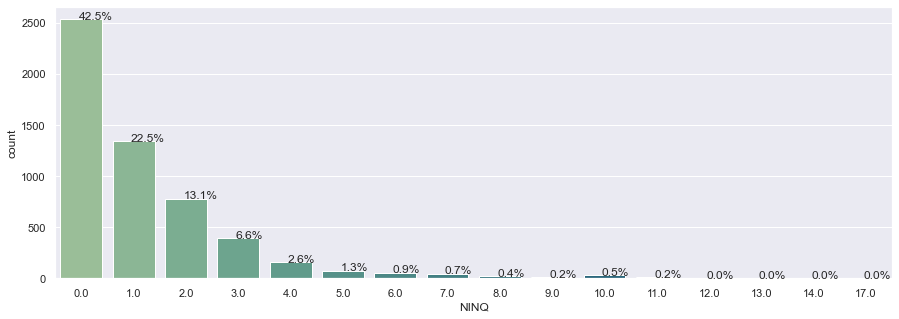

In [27]:
#Build barplot for NINQ

plt.figure(figsize=(15,5))
ax = sns.countplot(data["NINQ"],palette='crest')
perc_on_bar(ax,data["NINQ"])

**Insights**<br>
42% of the applicants had 0 recent credit inquiries

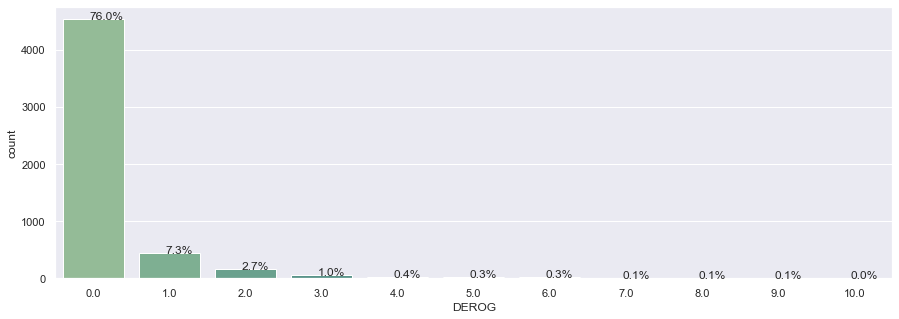

In [28]:
#Build barplot for DEROG

plt.figure(figsize=(15,5))
ax = sns.countplot(data["DEROG"],palette='crest')
perc_on_bar(ax,data["DEROG"])

**Insights**<br>
70% of the applicants had 0 derogatory reports.

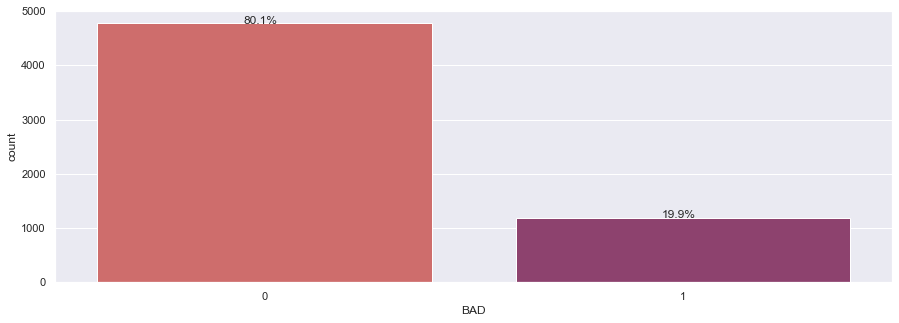

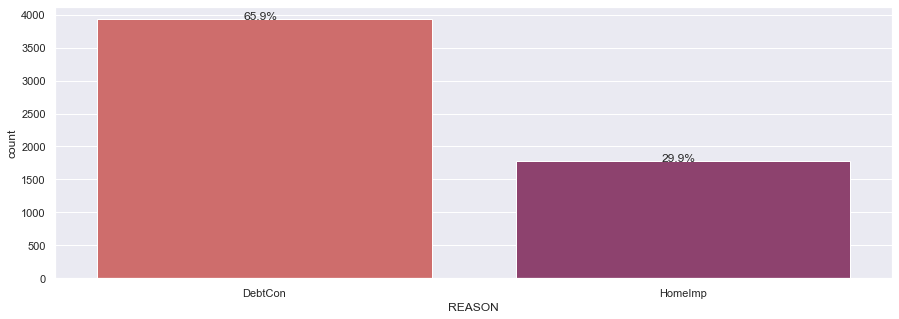

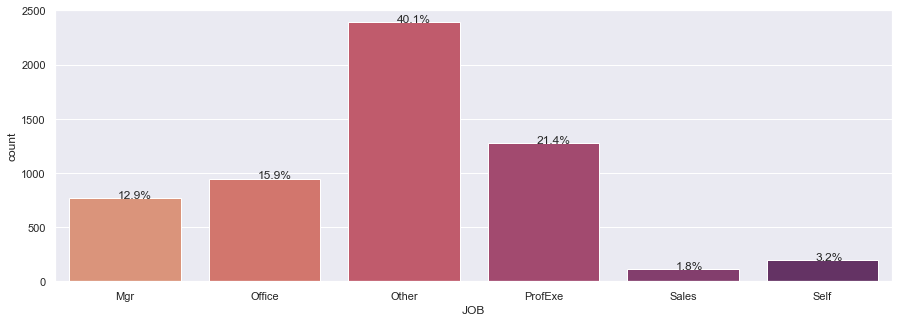

In [29]:
cat_cols = data.select_dtypes('category')
for col in cat_cols:
    plt.figure(figsize=(15,5))
    ax = sns.countplot(data[col],palette='flare')
    perc_on_bar(ax,data[col])

#### **Note:** As done above, analyze Histogram and Boxplot for other variables.

## **Bivariate Analysis**

###**Bivariate Analysis: Continuous and Categorical Variables**

#### Analyze BAD vs Loan

<AxesSubplot:xlabel='BAD', ylabel='LOAN'>

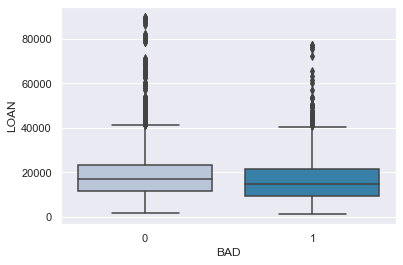

In [30]:
sns.boxplot(data["BAD"],data['LOAN'],palette="PuBu")

<AxesSubplot:xlabel='BAD', ylabel='DEBTINC'>

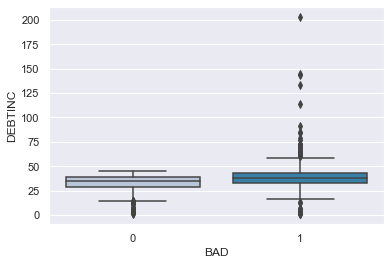

In [31]:
sns.boxplot(data["BAD"],data['DEBTINC'],palette="PuBu")

<AxesSubplot:xlabel='BAD', ylabel='VALUE'>

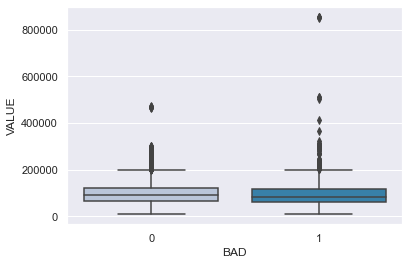

In [32]:
sns.boxplot(data["BAD"],data['VALUE'],palette="PuBu")

<AxesSubplot:xlabel='REASON', ylabel='LOAN'>

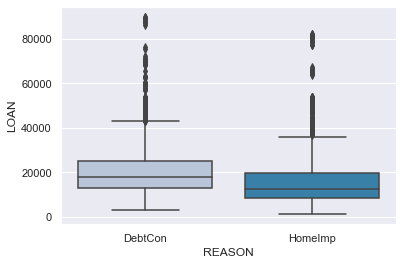

In [33]:
sns.boxplot(data["REASON"],data['LOAN'],palette="PuBu")

<AxesSubplot:xlabel='BAD', ylabel='NINQ'>

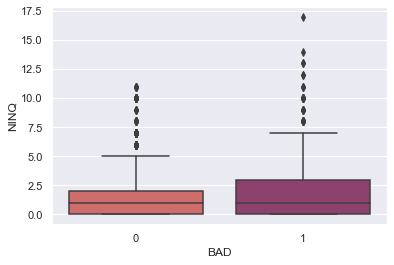

In [34]:
sns.boxplot(data["BAD"],data['NINQ'],palette="flare")

**Insights**<br>
The median value of debtinc was higher among the applicants who defaulted. Home improvements had a lower median loan value than the debtcon.

### **Bivariate Analysis: Two Continuous Variables**

<AxesSubplot:xlabel='VALUE', ylabel='MORTDUE'>

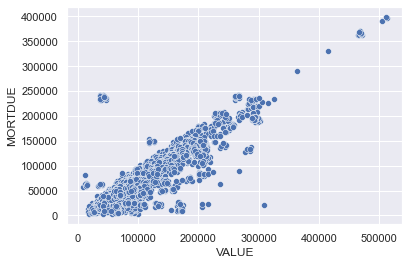

In [35]:
sns.scatterplot(data["VALUE"],data['MORTDUE'],palette="PuBu")

**Insights:**<br>
There a strong positive correlation between the value and the mortdue.

<AxesSubplot:xlabel='LOAN', ylabel='CLAGE'>

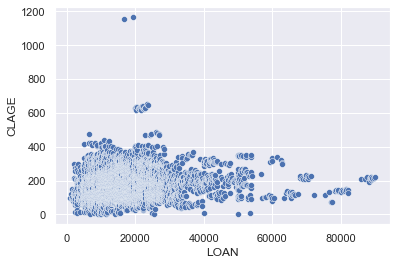

In [36]:
sns.scatterplot(data["LOAN"],data['CLAGE'],palette="PuBu")

<AxesSubplot:xlabel='LOAN', ylabel='MORTDUE'>

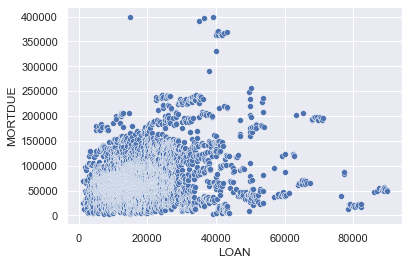

In [37]:
sns.scatterplot(data["LOAN"],data['MORTDUE'],palette="PuBu")

#### **Note:** As shown above, perform Bivariate Analysis on different pairs of continuous variables

**Insights** <br>
As the number of deliquent credit lines increases, the value of the loan is reduced.

### **Bivariate Analysis:  BAD vs Categorical Variables**

**The stacked bar chart (aka stacked bar graph)** extends the standard bar chart from looking at numeric values across one categorical variable to two.

In [38]:
### Function to plot stacked bar charts for categorical columns

def stacked_plot(x):
    sns.set(palette='nipy_spectral')
    tab1 = pd.crosstab(x,data['BAD'],margins=True)
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(x,data['BAD'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(10,5))
    plt.legend(loc='lower left', frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

#### Plot stacked bar plot for for BAD and REASON

BAD         0     1   All
REASON                   
DebtCon  3183   745  3928
HomeImp  1384   396  1780
All      4567  1141  5708
------------------------------------------------------------------------------------------------------------------------


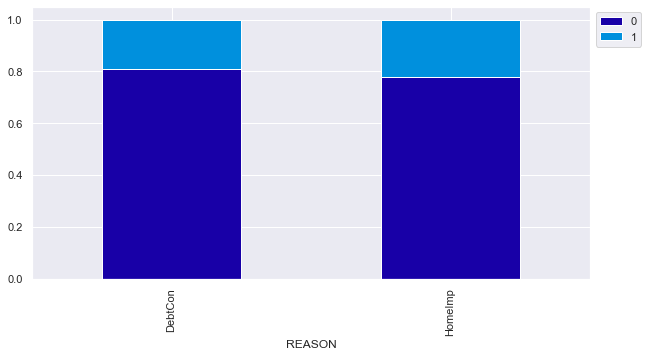

In [39]:
# Plot stacked bar plot for BAD and REASON
stacked_plot(data['REASON'])

BAD         0     1   All
JOB                      
Mgr       588   179   767
Office    823   125   948
Other    1834   554  2388
ProfExe  1064   212  1276
Sales      71    38   109
Self      135    58   193
All      4515  1166  5681
------------------------------------------------------------------------------------------------------------------------


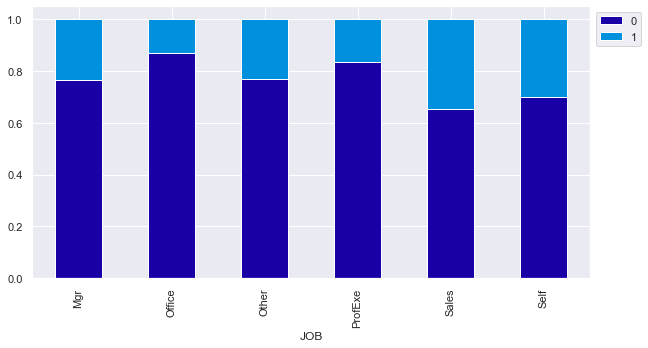

In [40]:
# Plot stacked bar plot for BAD and JOB
stacked_plot(data['JOB'])

**Insights **<br>
Sales has the lowest percentage in the job ccategory but has the highest percentage of defaults with in a category.

BAD        0     1   All
DELINQ                  
0.0     3596   583  4179
1.0      432   222   654
2.0      138   112   250
3.0       58    71   129
4.0       32    46    78
5.0        7    31    38
6.0        0    27    27
7.0        0    13    13
8.0        0     5     5
10.0       0     2     2
11.0       0     2     2
12.0       0     1     1
13.0       0     1     1
15.0       0     1     1
All     4263  1117  5380
------------------------------------------------------------------------------------------------------------------------


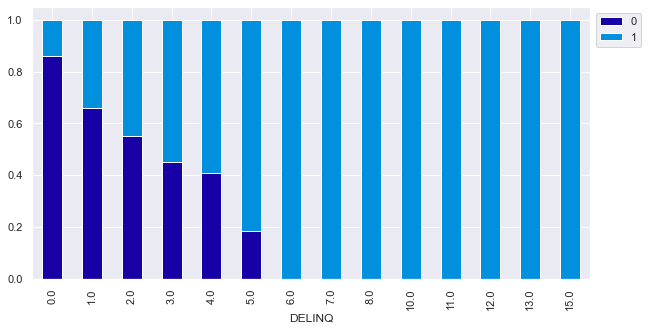

In [41]:
# Plot stacked bar plot for BAD and LOAN
stacked_plot(data['DELINQ'])

**Insights **<br>
 All of the applicants with more than 6 deliquent credit lines have defaulted on their payments  

BAD      0     1   All
NINQ                  
0.0   2135   396  2531
1.0   1085   254  1339
2.0    599   181   780
3.0    285   107   392
4.0     95    61   156
5.0     39    36    75
6.0     27    29    56
7.0     29    15    44
8.0     11    11    22
9.0      5     6    11
10.0    19     9    28
11.0     7     3    10
12.0     0     2     2
13.0     0     2     2
14.0     0     1     1
17.0     0     1     1
All   4336  1114  5450
------------------------------------------------------------------------------------------------------------------------


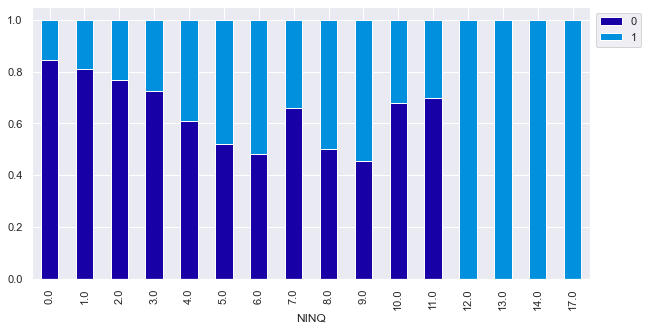

In [42]:
# Plot stacked bar plot for BAD and LOAN
stacked_plot(data['NINQ'])

**Insights**<br>
Applicants more than 11.0 credit inquiries have defaulted payments

BAD       0     1   All
DEROG                  
0.0    3773   754  4527
1.0     266   169   435
2.0      78    82   160
3.0      15    43    58
4.0       5    18    23
5.0       8     7    15
6.0       5    10    15
7.0       0     8     8
8.0       0     6     6
9.0       0     3     3
10.0      0     2     2
All    4150  1102  5252
------------------------------------------------------------------------------------------------------------------------


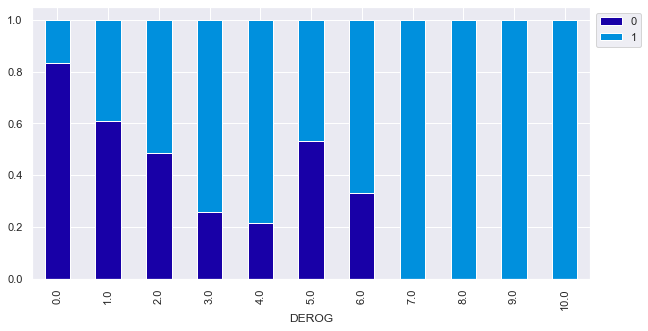

In [43]:
# Plot stacked bar plot for BAD and Derog
stacked_plot(data['DEROG'])

#### **Note:** As shown above, perform Bivariate Analysis on different pairs of Categorical vs BAD

### **Multivariate Analysis**

#### Analyze Correlation Heatmap for Numerical Variables

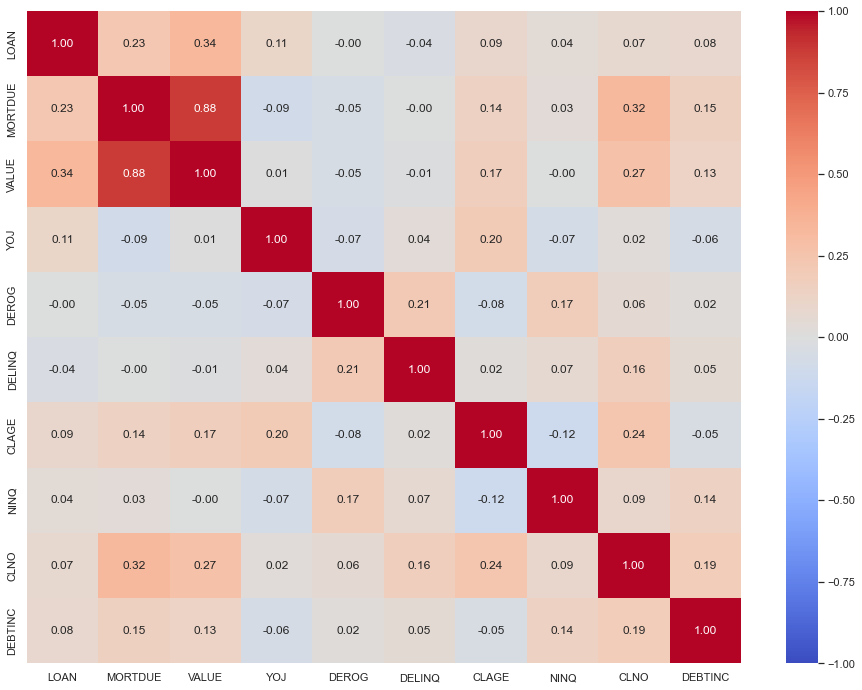

In [44]:
# Separating numerical variables
numerical_col = data.select_dtypes(include=np.number).columns.tolist()

# Build correlation matrix for numerical columns

corr = data[numerical_col].corr()

# plot the heatmap

plt.figure(figsize=(16,12))
sns.heatmap(corr,annot = True,cmap='coolwarm',vmax=1,vmin=-1,
        fmt=".2f",
        xticklabels=corr.columns,
        yticklabels=corr.columns);

Mortdue & value are highly correlated to each other. Mortdue & value show low positive correlation with clno & debtinc. Clage & debtinc has a low postive correlaation with clno.

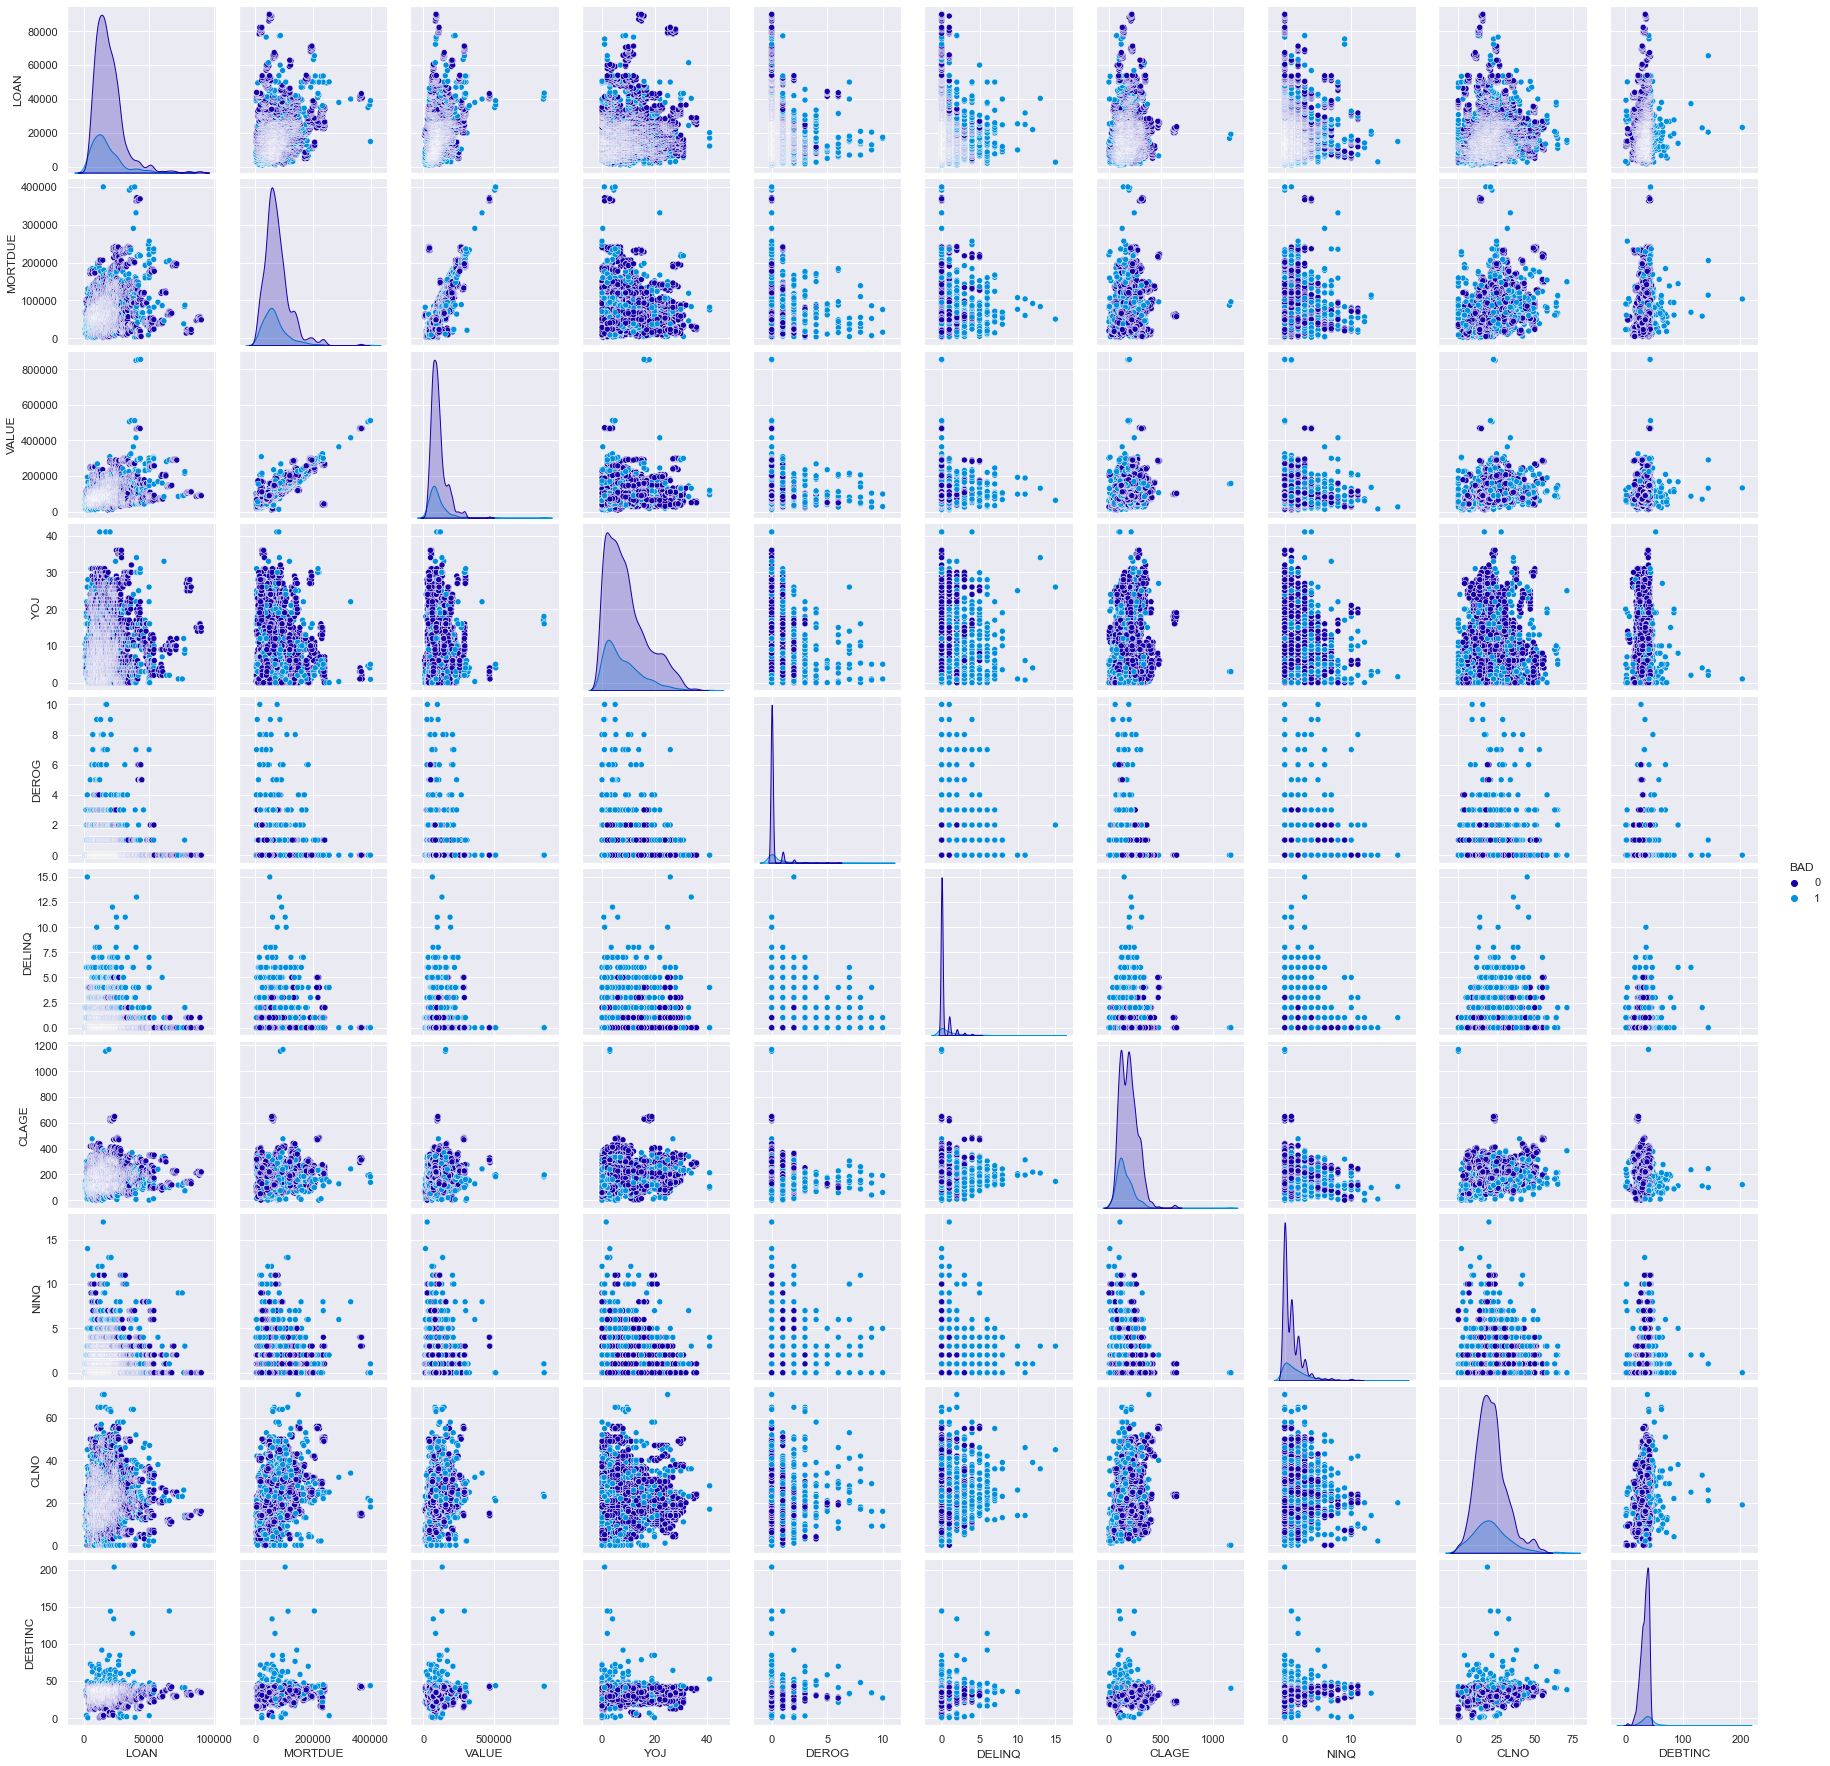

In [45]:
# Build pairplot for the data with hue = 'BAD'

sns.pairplot(data = data, hue = 'BAD')

#display the plot
plt.show()

**Insights**<br>
As expected there’s a high positive correlation between the value of the loan and the mortdue. There’s a low positive correlation between mortdue & clno(number of existing credit lines); between value of the loan & the clno. The data also shows a low positive correlation between clage & clno

#### Treating Outliers

In [46]:
def treat_outliers(df,col):
    '''
    treats outliers in a varaible
    col: str, name of the numerical varaible
    df: data frame
    col: name of the column
    '''
    
    Q1 = df[col].quantile(0.25) # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1   # IQR Range
    Lower_Whisker = Q1 - 1.5 *IQR  #define lower whisker
    Upper_Whisker = Q3 + 1.5 *IQR  # define upper Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker) # all the values smaller than Lower_Whisker will be assigned value of Lower_whisker 
                                                           # and all the values above upper_whishker will be assigned value of upper_Whisker 
    return df

def treat_outliers_all(df, col_list):
    '''
    treat outlier in all numerical varaibles
    col_list: list of numerical varaibles
    df: data frame
    '''
    for c in col_list:
        df = treat_outliers(df,c)
        
    return df
    

In [47]:
df_raw = data.copy()

numerical_col = df_raw.select_dtypes(include=np.number).columns.tolist()# getting list of numerical columns
numerical_col.remove('DELINQ')
numerical_col.remove('DEROG')

df = treat_outliers_all(df_raw,numerical_col)

In [48]:
df['DELINQ'] = df['DELINQ'].clip(0.0,2.0) # clipping delinq & deraog value to 2
df['DEROG'] = df['DEROG'].clip(0.0,2.0)

In [49]:
df.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100.0,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300.0,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500.0,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700.0,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


#### Adding new columns in the dataset for each column which has missing values 

In [50]:
#For each column we create a binary flag for the row, if there is missing value in the row, then 1 else 0. 
def add_binary_flag(df,col):
    '''
    df: It is the dataframe
    col: it is column which has missing values
    It returns a dataframe which has binary flag for missing values in column col
    '''
    new_col = str(col)
    new_col += '_missing_values_flag'
    df[new_col] = df[col].isna()
    return df

In [51]:
# list of columns that has missing values in it
missing_col = [col for col in df.columns if df[col].isnull().any()]

for colmn in missing_col:
    add_binary_flag(df,colmn)
    

#### Filling missing values in numerical columns with median and mode in categorical variables

In [52]:
#  Treat Missing values in numerical columns with median and mode in categorical variables
# Select numeric columns.
num_data = df.select_dtypes('number')

# Select string and object columns.
cat_data = df.select_dtypes('category').columns.tolist()

# Fill numeric columns with median.
df[num_data.columns] = num_data.fillna(num_data.median())

# Fill object columns with mode.
for column in cat_data:
    mode = df[column].mode()[0]
    df[column] = df[column].fillna(df[column].mode()[0])

In [53]:
df.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,...,VALUE_missing_values_flag,REASON_missing_values_flag,JOB_missing_values_flag,YOJ_missing_values_flag,DEROG_missing_values_flag,DELINQ_missing_values_flag,CLAGE_missing_values_flag,NINQ_missing_values_flag,CLNO_missing_values_flag,DEBTINC_missing_values_flag
0,1,1100.0,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,...,False,False,False,False,False,False,False,False,False,True
1,1,1300.0,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,...,False,False,False,False,False,False,False,False,False,True
2,1,1500.0,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,...,False,False,False,False,False,False,False,False,False,True
3,1,1500.0,65019.0,89235.5,DebtCon,Other,7.0,0.0,0.0,173.466667,...,True,True,True,True,True,True,True,True,True,True
4,0,1700.0,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,...,False,False,False,False,False,False,False,False,False,True


## **Data Preparation**

### **Separating the target variable from other variables**

In [54]:
# Drop the dependent variable from the dataframe and create the X(independent variable) matrix

X = df.drop(['BAD'],axis=1)

# Create dummy variables for the categorical variables - Hint: use the get_dummies() function

X = pd.get_dummies(X,drop_first=True)

# Create y(dependent varibale)

y = df['BAD']

# Scaling the data

sc = StandardScaler()

X_scaled = sc.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled, columns = X.columns)

### **Splitting the data into 70% train and 30% test set**

In [55]:
# Split the data into training and test set

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state = 1, stratify = y)

The data is imbalanced with class 1 in BAD constitutes of just 20 % of the dataset. It is recommended to use the **stratified sampling** technique to ensure that relative class frequencies are approximately preserved in each train and validation fold.

## **Model Evaluation Criterion**

In [56]:
#creating metric function 
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Not Default', 'Default'], yticklabels=['Not Default', 'Default'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

### **Build a Logistic Regression Model** 

In [57]:
# Defining the Logistic regression model

lg = LogisticRegression()

# Fitting the model on the training data 

lg.fit(X_train,y_train)

LogisticRegression()

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       0.91      0.96      0.93      3340
           1       0.78      0.63      0.70       832

    accuracy                           0.89      4172
   macro avg       0.85      0.79      0.82      4172
weighted avg       0.89      0.89      0.89      4172



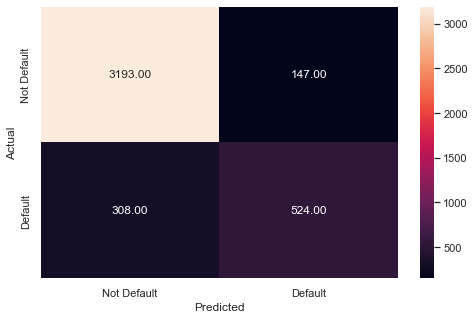

In [58]:
#Predict for train set

y_pred_train = lg.predict(X_train)

#checking the performance on the train dataset

metrics_score(y_train, y_pred_train)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.90      0.96      0.93      1431
           1       0.77      0.57      0.65       357

    accuracy                           0.88      1788
   macro avg       0.83      0.76      0.79      1788
weighted avg       0.87      0.88      0.87      1788



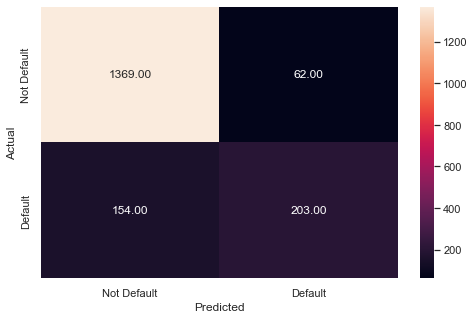

In [59]:
#Predict for test set

y_pred_test = lg.predict(X_test)

#checking the performance on the test dataset

metrics_score(y_test, y_pred_test)

**Observations:**<br>
The model is showing very similar results on the testing and training data suggesting that the model is able to generalise on the data.<br>
- **We are getting an accuracy of about 87%** on the train and the test datasets.
- However, **the recall for this model is only around 61% for class 1 on the train data and 57% on the test data.**
- As the recall is low, **this model will not perform well** in differentiating out applicants who have a high chance of defaulting. 
- As we can see from the Confusion Matrix, **this model is not good at identifying applicants who are at risk of defaulting.**<br>
Adjusting the threshold value to the optimum derived from the precision recall curve could improve the results.

#### Let's check the coefficients, and check which variables are important

In [60]:
# Printing the coefficients of logistic regression

cols = X.columns

coef_lg = lg.coef_

pd.DataFrame(coef_lg,columns = cols).T.sort_values(by = 0, ascending = False)

,0
DEBTINC_missing_values_flag,1.089814
DELINQ,0.707457
DEBTINC,0.707420
VALUE_missing_values_flag,0.684846
CLNO_missing_values_flag,0.510661
DEROG,0.366169
CLAGE_missing_values_flag,0.272718
MORTDUE_missing_values_flag,0.237934
VALUE,0.210728
NINQ,0.168082


**Insights **<br>
**Features that positively affect the applicant's risk of defaulting**<br>
DEBTINC_missing_values_flag<br>
DELINQ<br>
DEBTINC<br>
VALUE_missing_values_flag<br>
CLNO_missing_values_flag<br>
DEROG<br>
CLAGE_missing_values_flag	<br>

**Features that negatively affect the applicant defaulting are**<br>
JOB_ProfExe<br>
YOJ	<br>
MORTDUE	<br>
JOB_Office <br>
YOJ_missing_values_flag	<br>
DEROG_missing_values_flag <br>
DELINQ_missing_values_flag <br>
JOB_missing_values_flag	<br>
DEROG_missing_values_flag<br>
CLAGE <br>

The coefficients of the logistic regression model give us the log of odds, which is hard to interpret in the real world. We can convert the log of odds into odds by taking its exponential.

In [61]:
# Finding the odds
odds = np.exp(lg.coef_[0]) 

# Adding the odds to a DataFrame and sorting the values
pd.DataFrame(odds, X_train.columns, columns = ['odds']).sort_values(by = 'odds', ascending = False) 

,odds
DEBTINC_missing_values_flag,2.973721
DELINQ,2.028825
DEBTINC,2.028751
VALUE_missing_values_flag,1.983466
CLNO_missing_values_flag,1.666391
DEROG,1.442199
CLAGE_missing_values_flag,1.313530
MORTDUE_missing_values_flag,1.268625
VALUE,1.234577
NINQ,1.183033


- The odds of an applicant with a DEBTINC missing flag of defaulting are **3.18 times** the odds of one with no DEBTINC missing flag .
- The odds of an applicant with higher delinq and debtinc of defaulting are **double** the odds of an applicant with lower debtinc & delinq.

**The Precision-Recall Curve for Logistic Regression**

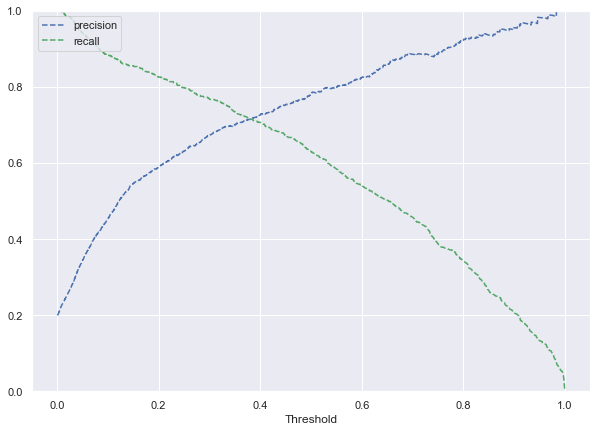

In [62]:
# predict_proba gives the probability of each observation belonging to each class

y_scores_lg = lg.predict_proba(X_train) 

precisions_lg, recalls_lg, thresholds_lg = precision_recall_curve(y_train, y_scores_lg[:, 1])

# Plot values of precisions, recalls, and thresholds
plt.figure(figsize = (10, 7))

plt.plot(thresholds_lg, precisions_lg[:-1], 'b--', label = 'precision')

plt.plot(thresholds_lg, recalls_lg[:-1], 'g--', label = 'recall')

plt.xlabel('Threshold')

plt.legend(loc = 'upper left')

plt.ylim([0, 1])

plt.show()

Observation:

We can see that the precision and the recall are balanced for a threshold of about 0.35.


              precision    recall  f1-score   support

           0       0.93      0.92      0.93      3340
           1       0.70      0.73      0.72       832

    accuracy                           0.88      4172
   macro avg       0.82      0.83      0.82      4172
weighted avg       0.89      0.88      0.89      4172



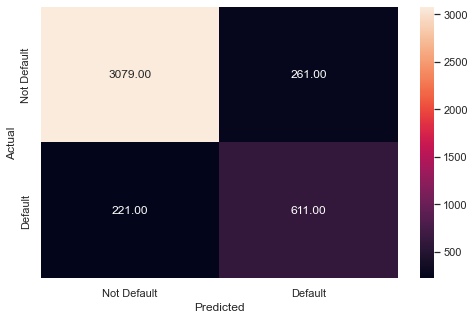

In [63]:
optimal_threshold1 = .35

y_pred_train = lg.predict_proba(X_train)

metrics_score(y_train, y_pred_train[:, 1] > optimal_threshold1)

**Observations:**

- **The model performance has improved. The recall has increased significantly for class 1.**


              precision    recall  f1-score   support

           0       0.92      0.93      0.93      1431
           1       0.71      0.68      0.70       357

    accuracy                           0.88      1788
   macro avg       0.82      0.81      0.81      1788
weighted avg       0.88      0.88      0.88      1788



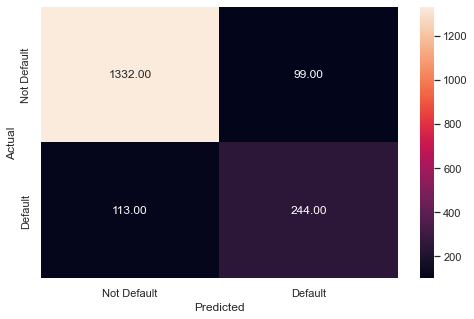

In [64]:
optimal_threshold1 = .35

y_pred_test = lg.predict_proba(X_test)

metrics_score(y_test, y_pred_test[:, 1] > optimal_threshold1)

**Observations:**

- The model is giving a **similar performance on the test and the train datasets**, i.e., the model is giving a generalized performance.
- **The recall of the test data has increased** to 68% from 59% for the test dataset while at the same time, the precision has decreased slightly from 74% to 71%, which is to be expected while adjusting the threshold.

In [65]:
# Defining the Logistic regression model with class weights

lg_wt =LogisticRegression(class_weight ={0:0.2,1:0.8})

# Fitting the model on the training data 

lg_wt.fit(X_train,y_train)

LogisticRegression(class_weight={0: 0.2, 1: 0.8})

#### Checking the performance on the train dataset

Training metrics
              precision    recall  f1-score   support

           0       0.95      0.86      0.90      3340
           1       0.59      0.83      0.69       832

    accuracy                           0.85      4172
   macro avg       0.77      0.84      0.80      4172
weighted avg       0.88      0.85      0.86      4172



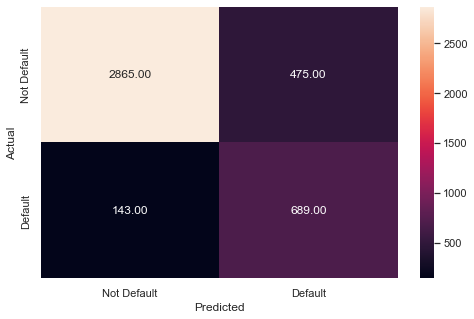

Testing metrics
              precision    recall  f1-score   support

           0       0.94      0.86      0.90      1431
           1       0.59      0.79      0.68       357

    accuracy                           0.85      1788
   macro avg       0.77      0.83      0.79      1788
weighted avg       0.87      0.85      0.86      1788



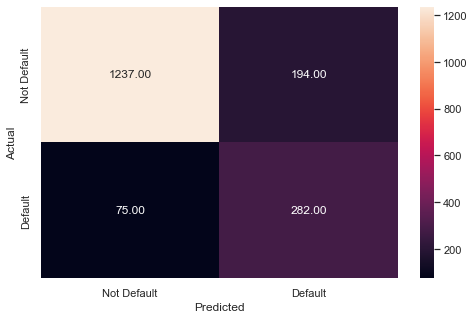

In [66]:
#Predict for train set

y_pred_train = lg_wt.predict(X_train)

#checking the performance on the train dataset
print('Training metrics')
metrics_score(y_train, y_pred_train)

#checking the performance on the test dataset

y_pred_test = lg_wt.predict(X_test)

print('Testing metrics')
metrics_score(y_test, y_pred_test)

The model has generalised on teh training & testing dataset but the precision scores are low. There are 41 % chance of classifying a good applicant as a one that defaults.

**Hyperparameter tuning of the logistic regression model using GridSearchCV**

In [67]:
# define model
lg_model = LogisticRegression(class_weight ={0:0.2,1:0.8})

# define evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# define search space
space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
space['C'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]

#scorer = metrics.make_scorer(recall_score, pos_label = 1)

# define search
search = GridSearchCV(lg_model, space, scoring ='roc_auc', n_jobs=-1, cv=cv)

# execute search
result = search.fit(X_train, y_train)

lg_estimator = result.best_estimator_

# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.906003326107395
Best Hyperparameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}


In [68]:
# Fit the best estimator on the training data
lg_estimator.fit(X_train, y_train)

LogisticRegression(C=0.1, class_weight={0: 0.2, 1: 0.8}, solver='liblinear')

              precision    recall  f1-score   support

           0       0.95      0.86      0.90      3340
           1       0.59      0.82      0.68       832

    accuracy                           0.85      4172
   macro avg       0.77      0.84      0.79      4172
weighted avg       0.88      0.85      0.86      4172



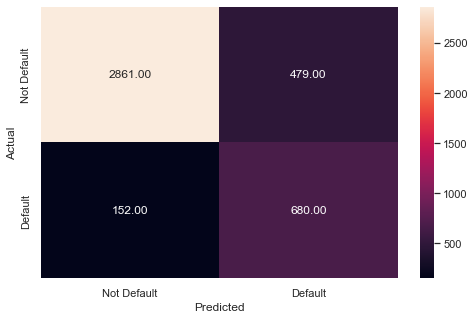

In [69]:
#Checking the performance on the training dataset
y_pred_train_lg_estimator = lg_estimator.predict(X_train)

metrics_score(y_train, y_pred_train_lg_estimator)

              precision    recall  f1-score   support

           0       0.94      0.86      0.90      1431
           1       0.59      0.79      0.67       357

    accuracy                           0.85      1788
   macro avg       0.77      0.83      0.79      1788
weighted avg       0.87      0.85      0.86      1788



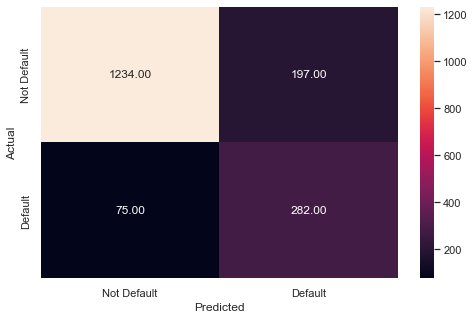

In [70]:
#Checking the performance on the testing dataset

y_pred_test_lg_estimator = lg_estimator.predict(X_test)

metrics_score(y_test, y_pred_test_lg_estimator)

The model has generalised results on both the test & training dataset but has average recall scores. The scores havent improved from before tuning the dataset.

              precision    recall  f1-score   support

           0       0.95      0.87      0.91      3340
           1       0.60      0.81      0.69       832

    accuracy                           0.85      4172
   macro avg       0.77      0.84      0.80      4172
weighted avg       0.88      0.85      0.86      4172



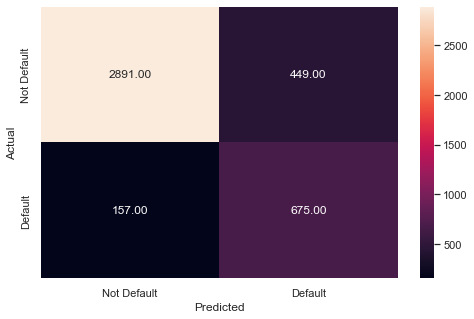

              precision    recall  f1-score   support

           0       0.94      0.87      0.91      1431
           1       0.60      0.79      0.68       357

    accuracy                           0.85      1788
   macro avg       0.77      0.83      0.79      1788
weighted avg       0.88      0.85      0.86      1788



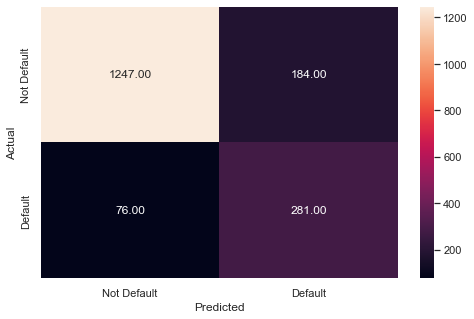

In [71]:
from sklearn.svm import SVC

svm = SVC(kernel='linear',class_weight={0:0.2,1:0.80},C=0.5) 

svm.fit(X_train, y_train)

#Predict for train set

y_pred_train_svm = svm.predict(X_train)

#checking the performance on the train dataset

metrics_score(y_train, y_pred_train_svm)
#Predict for test set

y_pred_test_svm =svm.predict(X_test)

#checking the performance on the test dataset

metrics_score(y_test, y_pred_test_svm)

The svm model also has generalised on the training & testing dataset with goof recall scores but low precision scores.

In [72]:
svm_tuned =SVC(class_weight ={0:0.2,1:0.8})
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
#scorer = metrics.make_scorer(recall_score, pos_label = 1)    
grid = GridSearchCV(svm_tuned, param_grid,scoring = 'roc_auc', cv = 3)
  
# fitting the model for grid search
gridcv =grid.fit(X_train, y_train)
svm_tuned = gridcv.best_estimator_
svm_tuned.fit(X_train, y_train)

SVC(C=100, class_weight={0: 0.2, 1: 0.8}, gamma=1)

              precision    recall  f1-score   support

           0       0.95      0.87      0.91      3340
           1       0.60      0.81      0.69       832

    accuracy                           0.85      4172
   macro avg       0.77      0.84      0.80      4172
weighted avg       0.88      0.85      0.86      4172



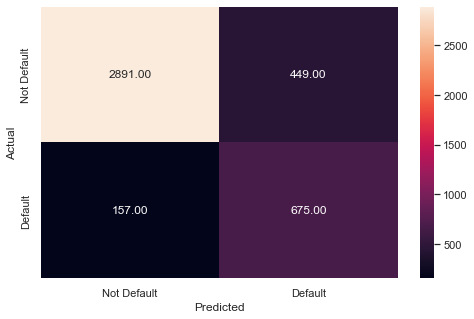

              precision    recall  f1-score   support

           0       0.83      0.99      0.90      1431
           1       0.79      0.18      0.30       357

    accuracy                           0.83      1788
   macro avg       0.81      0.59      0.60      1788
weighted avg       0.82      0.83      0.78      1788



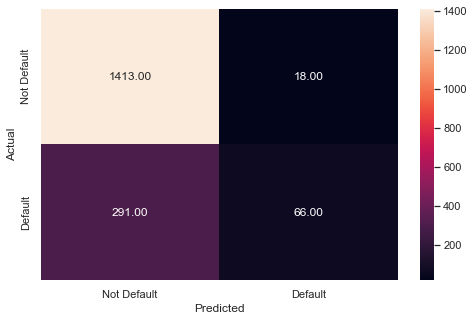

In [73]:
#Predict for train set

y_pred_train_svmtuned = svm_tuned.predict(X_train)

#checking the performance on the train dataset

metrics_score(y_train, y_pred_train_svm)
#Predict for test set

y_pred_test_svmtuned = svm_tuned.predict(X_test)

#checking the performance on the test dataset

metrics_score(y_test, y_pred_test_svmtuned)

### **K-Nearest Neighbors (K-NN)**

Before actually building the model, we need to identify the value of K to be used in K-NN. 
For every value of K (from 1 to 15), split the training set into a new train and validation sets (30 times)
Scale the training data and the validation data
Take the average of the error on these training and the validation sets for each value of K
Plot the average train vs validation error for all Ks
Choose the optimal K from the plot where the two errors are comparable


In [74]:
knn = KNeighborsClassifier()

# We select the optimal value of K for which the error rate is the least in the validation data
# Let us loop over a few values of K to determine the optimal value of K

train_error = []

test_error = []

knn_many_split = {}

error_df_knn = pd.DataFrame()

features = X.columns

for k in range(1, 15):
    train_error = []
    
    test_error = []
    
    lista = []
    
    knn = KNeighborsClassifier(n_neighbors = k)
    
    for i in range(30):
        x_train_new, x_val, y_train_new, y_val = train_test_split(X_train, y_train, test_size = 0.30, stratify = y_train)
    
        # Fitting K-NN on the training data
        knn.fit(x_train_new, y_train_new),
        
        # Calculating error on the training data and the validation data
        train_error.append(1 - knn.score(x_train_new, y_train_new)) 
        
        test_error.append(1 - knn.score(x_val, y_val))
    
    lista.append(sum(train_error)/len(train_error))
    
    lista.append(sum(test_error)/len(test_error))
    
    knn_many_split[k] = lista

knn_many_split

{1: [0.0, 0.09068157614483492],
 2: [0.06719178082191782, 0.11781150159744408],
 3: [0.05520547945205478, 0.100346112886049],
 4: [0.08463470319634704, 0.11208732694355697],
 5: [0.07509132420091325, 0.10101171458998935],
 6: [0.09309360730593606, 0.11514909478168264],
 7: [0.0855593607305936, 0.10945154419595314],
 8: [0.09985159817351595, 0.11948881789137379],
 9: [0.09498858447488585, 0.11315228966986157],
 10: [0.10455479452054796, 0.12127263045793395],
 11: [0.10148401826484019, 0.11453674121405756],
 12: [0.10928082191780822, 0.12279020234291797],
 13: [0.1053995433789954, 0.11919595314164004],
 14: [0.11163242009132417, 0.1244675186368477]}

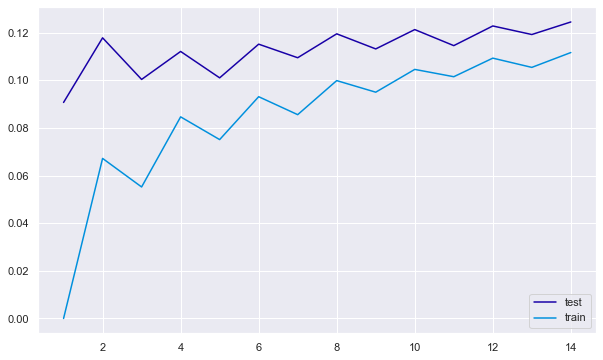

In [75]:
kltest = []

vltest = []

for k, v in knn_many_split.items():
    kltest.append(k)
    
    vltest.append(knn_many_split[k][1])

kltrain = []

vltrain = []

for k, v in knn_many_split.items():
    kltrain.append(k)
    
    vltrain.append(knn_many_split[k][0])

# Plotting K vs Error
plt.figure(figsize = (10, 6))

plt.plot(kltest, vltest, label = 'test' )

plt.plot(kltrain, vltrain, label = 'train')

plt.legend()

plt.show()

**Observations:**
- We can see that the test error (error on the validation data) is more or less similar for K greater than or equal to 3. But the training error keeps increasing with increasing K.
- This implies that we would get a lower train and test error if we choose K = 3. Also, if we choose a higher value of K, the model would get biased due to the imbalance in the dataset.


In [76]:
# Define K-NN model

knn = KNeighborsClassifier(n_neighbors = 3)

# Fitting data to the K-NN model

knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

              precision    recall  f1-score   support

           0       0.95      0.98      0.97      3340
           1       0.93      0.80      0.86       832

    accuracy                           0.95      4172
   macro avg       0.94      0.89      0.91      4172
weighted avg       0.95      0.95      0.95      4172



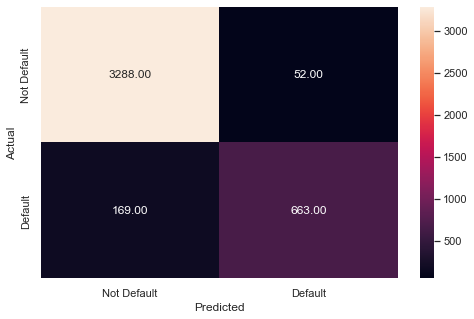

In [77]:
# Checking the performance of K-NN model on the training data
y_pred_train_knn = knn.predict(X_train)

metrics_score(y_train, y_pred_train_knn)

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1431
           1       0.84      0.63      0.72       357

    accuracy                           0.90      1788
   macro avg       0.88      0.80      0.83      1788
weighted avg       0.90      0.90      0.90      1788



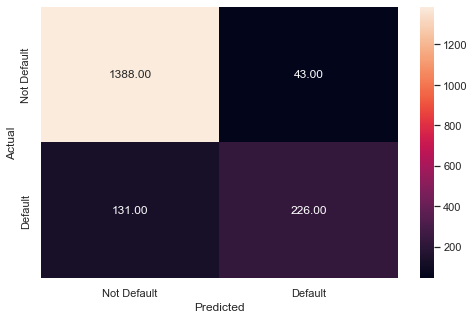

In [78]:
# Checking the performance of K-NN model on the testing data
y_pred_test_knn = knn.predict(X_test)

metrics_score(y_test, y_pred_test_knn)

The model has a much higher recall for the training data set than the testing dataset. It's an overfit model

### **Using GridSearchCV for Hyperparameter tuning of the model**

In [79]:
params_knn = {'n_neighbors': np.arange(2, 15), 'weights': ['uniform', 'distance'], 'p': [1, 2]}

grid_knn = GridSearchCV(estimator = knn, param_grid = params_knn, scoring = 'roc_auc', cv = 5)

model_knn = grid_knn.fit(X_train,y_train)

knn_estimator = model_knn.best_estimator_

print(knn_estimator)

KNeighborsClassifier(n_neighbors=10, p=1, weights='distance')


In [80]:
# Fit the best estimator on the training data
knn_estimator.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10, p=1, weights='distance')

**Checking the performance on the training dataset**

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3340
           1       1.00      1.00      1.00       832

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



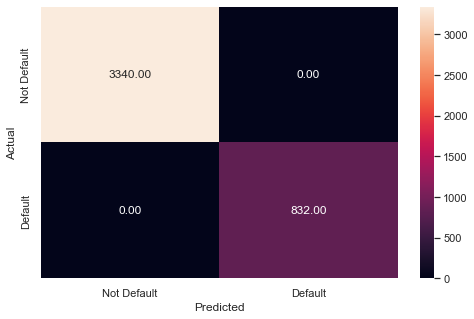

In [81]:
y_pred_train_knn_estimator = knn_estimator.predict(X_train)

metrics_score(y_train, y_pred_train_knn_estimator)

**Checking the performance on the testing dataset**

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      1431
           1       0.93      0.59      0.72       357

    accuracy                           0.91      1788
   macro avg       0.92      0.79      0.84      1788
weighted avg       0.91      0.91      0.90      1788



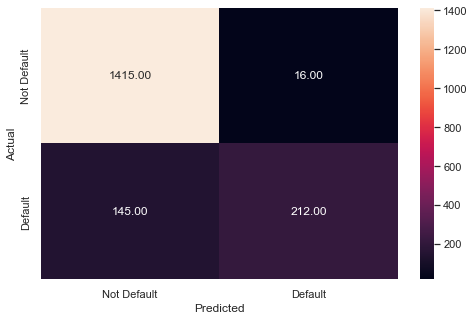

In [82]:
y_pred_test_knn_estimator = knn_estimator.predict(X_test)

metrics_score(y_test, y_pred_test_knn_estimator)

**Observations:**

- This model seems to be overfitting but **the results have significantly improved** in comparison to previous model. But it is an overfit model.
- **Test recall has significantly increased** by tuning the K-NN classifier.
- The precision, f1 score and accuracy are good for the training data set at 87%, 80% and 93% respectively.

### **Linear Discriminant Analysis**

In [83]:
# Fitting the LDA model
lda = LinearDiscriminantAnalysis()

lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

              precision    recall  f1-score   support

           0       0.92      0.94      0.93      3340
           1       0.73      0.67      0.70       832

    accuracy                           0.88      4172
   macro avg       0.82      0.80      0.81      4172
weighted avg       0.88      0.88      0.88      4172



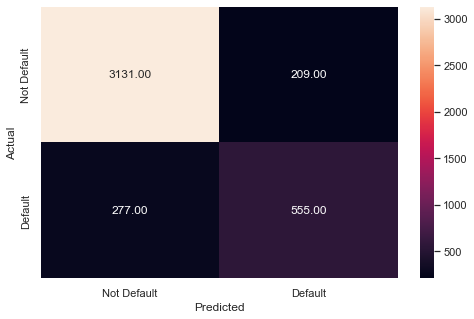

In [84]:
# Checking model performance of LDA
y_pred_train_lda = lda.predict(X_train)

metrics_score(y_train, y_pred_train_lda)

              precision    recall  f1-score   support

           0       0.91      0.94      0.93      1431
           1       0.72      0.63      0.67       357

    accuracy                           0.88      1788
   macro avg       0.82      0.78      0.80      1788
weighted avg       0.87      0.88      0.87      1788



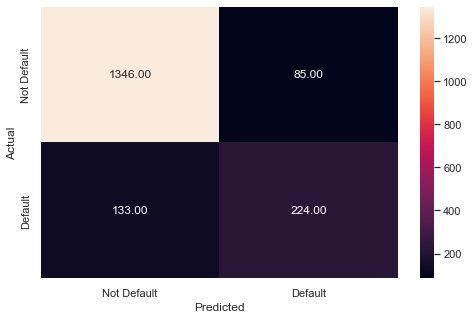

In [85]:
y_pred_test_lda = lda.predict(X_test)

metrics_score(y_test, y_pred_test_lda)

**Observations:**

- This model has generalised on both the test & training dataset. But it the recall scores are average.

In [86]:
# Creating the list of column names
cols = X.columns

# Saving coefficients of LDA model
coef_lda = lda.coef_

# Printing the cofficients of LDA
pd.DataFrame(coef_lda, columns = cols).T.sort_values(by = 0, ascending = False)

,0
DEBTINC_missing_values_flag,1.799441
DELINQ,0.950479
VALUE_missing_values_flag,0.619410
DEROG,0.533489
DEBTINC,0.498592
CLAGE_missing_values_flag,0.329781
CLNO_missing_values_flag,0.305951
MORTDUE_missing_values_flag,0.243062
VALUE,0.208282
NINQ,0.200097


**Precision-Recall Curve for LDA**

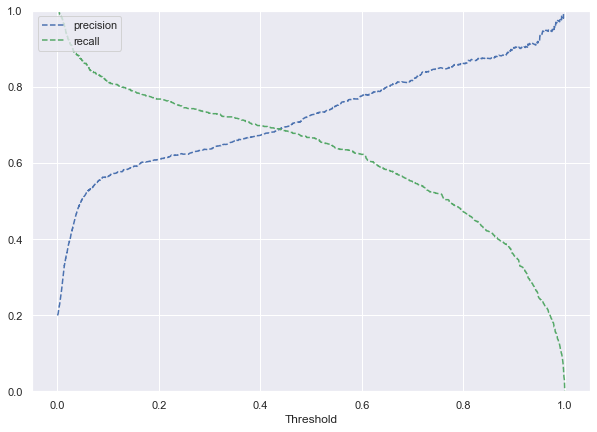

In [87]:
y_scores_lda = lda.predict_proba(X_train) # predict_proba gives the probability of each observation belonging to each class

precisions_lda, recalls_lda, thresholds_lda = precision_recall_curve(y_train, y_scores_lda[:, 1])

# Plot values of precisions, recalls, and thresholds
plt.figure(figsize = (10, 7))

plt.plot(thresholds_lda, precisions_lda[:-1], 'b--', label = 'precision')

plt.plot(thresholds_lda, recalls_lda[:-1], 'g--', label = 'recall')

plt.xlabel('Threshold')

plt.legend(loc = 'upper left')

plt.ylim([0, 1])

plt.show()

**Observation**
The precision and the recall are balanced for a threshold of about 0.50 which is the default.

### **Quadratic Discriminant Analysis**

In [88]:
# Fitting QDA model
qda = QuadraticDiscriminantAnalysis()

qda.fit(X_train, y_train)

QuadraticDiscriminantAnalysis()

              precision    recall  f1-score   support

           0       0.92      0.89      0.90      3340
           1       0.61      0.71      0.65       832

    accuracy                           0.85      4172
   macro avg       0.77      0.80      0.78      4172
weighted avg       0.86      0.85      0.86      4172



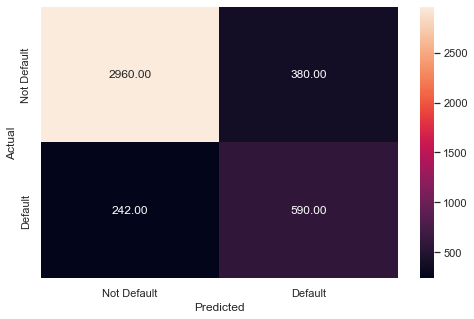

In [89]:
# Checking model performance on the training data
y_pred_train_qda = qda.predict(X_train)

metrics_score(y_train, y_pred_train_qda)

              precision    recall  f1-score   support

           0       0.92      0.91      0.91      1431
           1       0.64      0.66      0.65       357

    accuracy                           0.86      1788
   macro avg       0.78      0.78      0.78      1788
weighted avg       0.86      0.86      0.86      1788



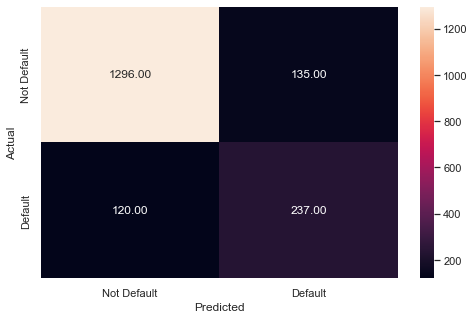

In [90]:
# Checking performance of the model on the test data
y_pred_test_qda = qda.predict(X_test)

metrics_score(y_test, y_pred_test_qda)

**The model is a slightly overfit model.**

### **Build a Decision Tree Model**

#### Data Preparation for the tree based model

In [91]:
# Add binary flags
def add_binary_flag(df,col):
    '''
    df: It is the dataframe
    col: it is column which has missing values
    It returns a dataframe which has binary flag for missing values in column col
    '''
    new_col = str(col)
    new_col += '_missing_values_flag'
    df[new_col] = df[col].isna()
    return df
# List of columns that has missing values in it
missing_col = [col for col in data.columns if data[col].isnull().any()]

for colmn in missing_col:
    add_binary_flag(data,colmn)

In [92]:
#  Treat Missing values in numerical columns with median and mode in categorical variables
# Select numeric columns.
num_data = data.select_dtypes('number')

# Select string and object columns.
cat_data = data.select_dtypes('category').columns.tolist()#df.select_dtypes('object')

# Fill numeric columns with median.
data[num_data.columns] = num_data.fillna(num_data.median())

# Fill object columns with model.
for column in cat_data:
    mode = data[column].mode()[0]
    data[column] = data[column].fillna(data[column].mode()[0])

In [93]:
data.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,...,VALUE_missing_values_flag,REASON_missing_values_flag,JOB_missing_values_flag,YOJ_missing_values_flag,DEROG_missing_values_flag,DELINQ_missing_values_flag,CLAGE_missing_values_flag,NINQ_missing_values_flag,CLNO_missing_values_flag,DEBTINC_missing_values_flag
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,...,False,False,False,False,False,False,False,False,False,True
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,...,False,False,False,False,False,False,False,False,False,True
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,...,False,False,False,False,False,False,False,False,False,True
3,1,1500,65019.0,89235.5,DebtCon,Other,7.0,0.0,0.0,173.466667,...,True,True,True,True,True,True,True,True,True,True
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,...,False,False,False,False,False,False,False,False,False,True


#### Separating the target variable y and independent variable x

In [94]:
# Drop dependent variable from dataframe and create the X(independent variable) matrix

X = data.drop(['BAD'],axis =1)

# Create dummy variables for the categorical variables - Hint: use the get_dummies() function

X = pd.get_dummies(X, drop_first = True)

# Create y(dependent varibale)

y = data['BAD']

In [95]:
# Scaling the data
sc = StandardScaler()

X_scaled = sc.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled, columns = X.columns)

#### Split the data

In [96]:
# Split the data into training and test set

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state = 1, stratify = y)

In [97]:
#Defining Decision tree model with class weights class_weight={0: 0.2, 1: 0.8}

dt = DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, criterion='entropy',random_state=1)
#fitting Decision tree model

dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, criterion='entropy',
                       random_state=1)

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3340
           1       1.00      1.00      1.00       832

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



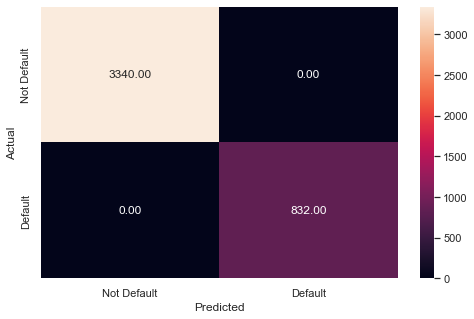

In [98]:
# Checking performance on the training data

y_train_pred_dt = dt.predict(X_train)

metrics_score(y_train, y_train_pred_dt)

**Observation:**

- The Decision tree is giving a **100% score for all metrics on the training dataset.**

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.92      0.94      0.93      1431
           1       0.73      0.66      0.70       357

    accuracy                           0.88      1788
   macro avg       0.82      0.80      0.81      1788
weighted avg       0.88      0.88      0.88      1788



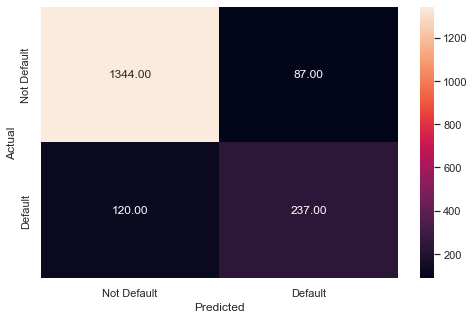

In [99]:
# Checking performance on the testing data

y_test_pred_dt = dt.predict(X_test)

metrics_score(y_test, y_test_pred_dt)

**Insights **<br>

The Decision Tree works well on the training data but not so well on the test data as the recall is 0.62 in comparison to 1 for the training dataset, i.e., the Decision Tree is overfitting the training data.
The precision on the test data suggests that there's a 26% (1 - 0.75) chance that the model will predict that a applicant is going to default even though he/she would not. The accuracy is 88% for the test dataset.

### **Decision Tree - Hyperparameter Tuning**

* Hyperparameter tuning is tricky in the sense that **there is no direct way to calculate how a change in the hyperparameter value will reduce the loss of your model**, so we usually resort to experimentation. We'll use Grid search to perform hyperparameter tuning.
* **Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.** 
* **It is an exhaustive search** that is performed on the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are **optimized by cross-validated grid-search** over a parameter grid.

**Criterion {“gini”, “entropy”}**

The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.

**max_depth** 

The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

**min_samples_leaf**

The minimum number of samples is required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.

You can learn about more Hyperpapameters on this link and try to tune them. 

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html


#### Using GridSearchCV for Hyperparameter tuning on the model

In [100]:
# Choose the type of classifier. 

dtree_estimator = DecisionTreeClassifier(random_state = 1)

# Grid of parameters to choose from


parameters = {'max_depth': np.arange(2, 12),
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [50,55,60,65,70,75],
              'class_weight':['balanced',{0:0.20,1:0.80},{0:0.30,1:0.70}]
                        
             }


# Type of scoring used to compare parameter combinations

scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search

gridCV = GridSearchCV(dtree_estimator, parameters, scoring = 'roc_auc', cv = 5)


# Fit the GridSearch on train dataset

gridCV = gridCV.fit(X_train, y_train)


# Set the clf to the best combination of parameters

dtree_estimator = gridCV.best_estimator_

# Fit the best algorithm to the data. 

dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, criterion='entropy',
                       max_depth=9, min_samples_leaf=75, random_state=1)

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       0.94      0.90      0.92      3340
           1       0.66      0.76      0.71       832

    accuracy                           0.88      4172
   macro avg       0.80      0.83      0.81      4172
weighted avg       0.88      0.88      0.88      4172



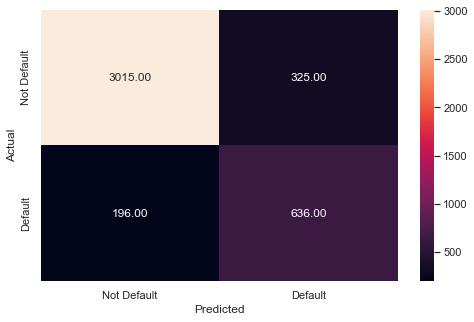

In [101]:
# Checking performance on the training data based on the tuned model

y_train_pred_dt2 = dtree_estimator.predict(X_train)

metrics_score(y_train, y_train_pred_dt2)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.93      0.91      0.92      1431
           1       0.66      0.71      0.68       357

    accuracy                           0.87      1788
   macro avg       0.79      0.81      0.80      1788
weighted avg       0.87      0.87      0.87      1788



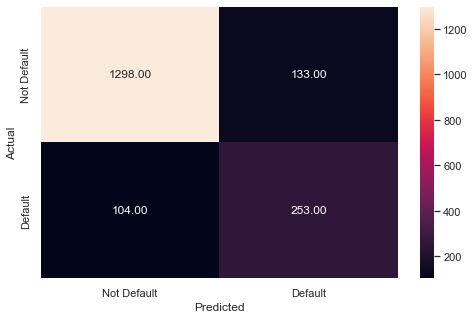

In [102]:
# Checking performance on the testing data based on the tuned model

y_test_pred_dt2 = dtree_estimator.predict(X_test)

metrics_score(y_test, y_test_pred_dt2)

**Insights ** <br>

This model is overfitting the training data but the recall has improved from 0.62 to 0.80 for the testing dataset and giving approximately the same result on the test and train datasets for the precision(~0.58) and accurracy app 0.85.
Precision has gone down significantly from .74 to .57 in comparison to the previous model which means the tuned model will give a high number of false positives, i.e., this model will predict the applicant will default even if they won't, and this will result in loss of customers and revenue to the bank.

<AxesSubplot:xlabel='Importance'>

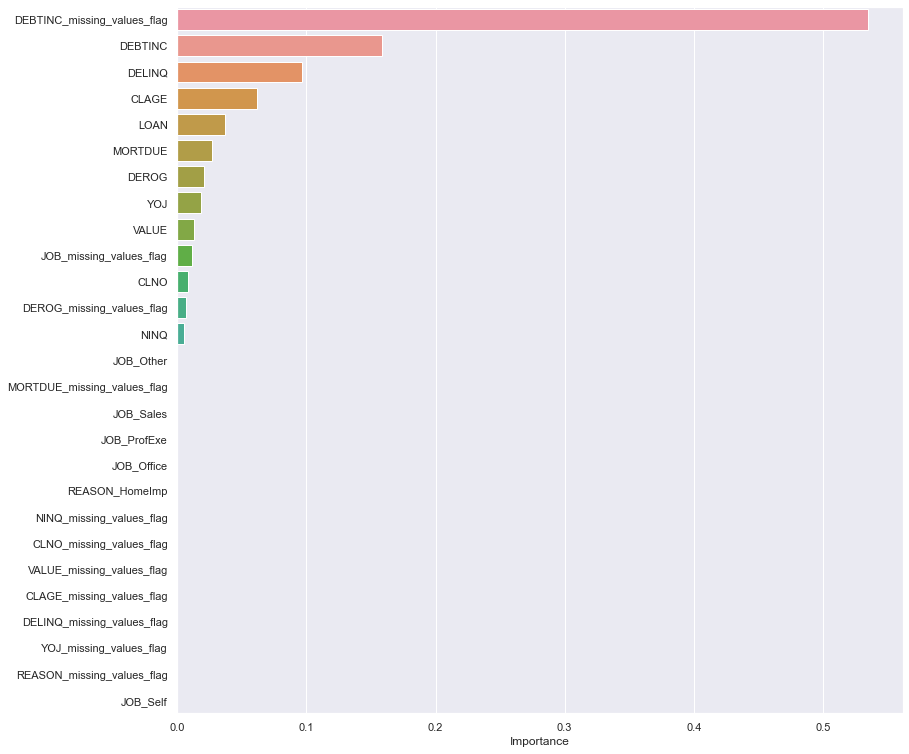

In [103]:
importances = dtree_estimator.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(importance_df.Importance, importance_df.index)

The most important features are debtinc missing flag, debtinc, delinq, clage, mortdue, loan.

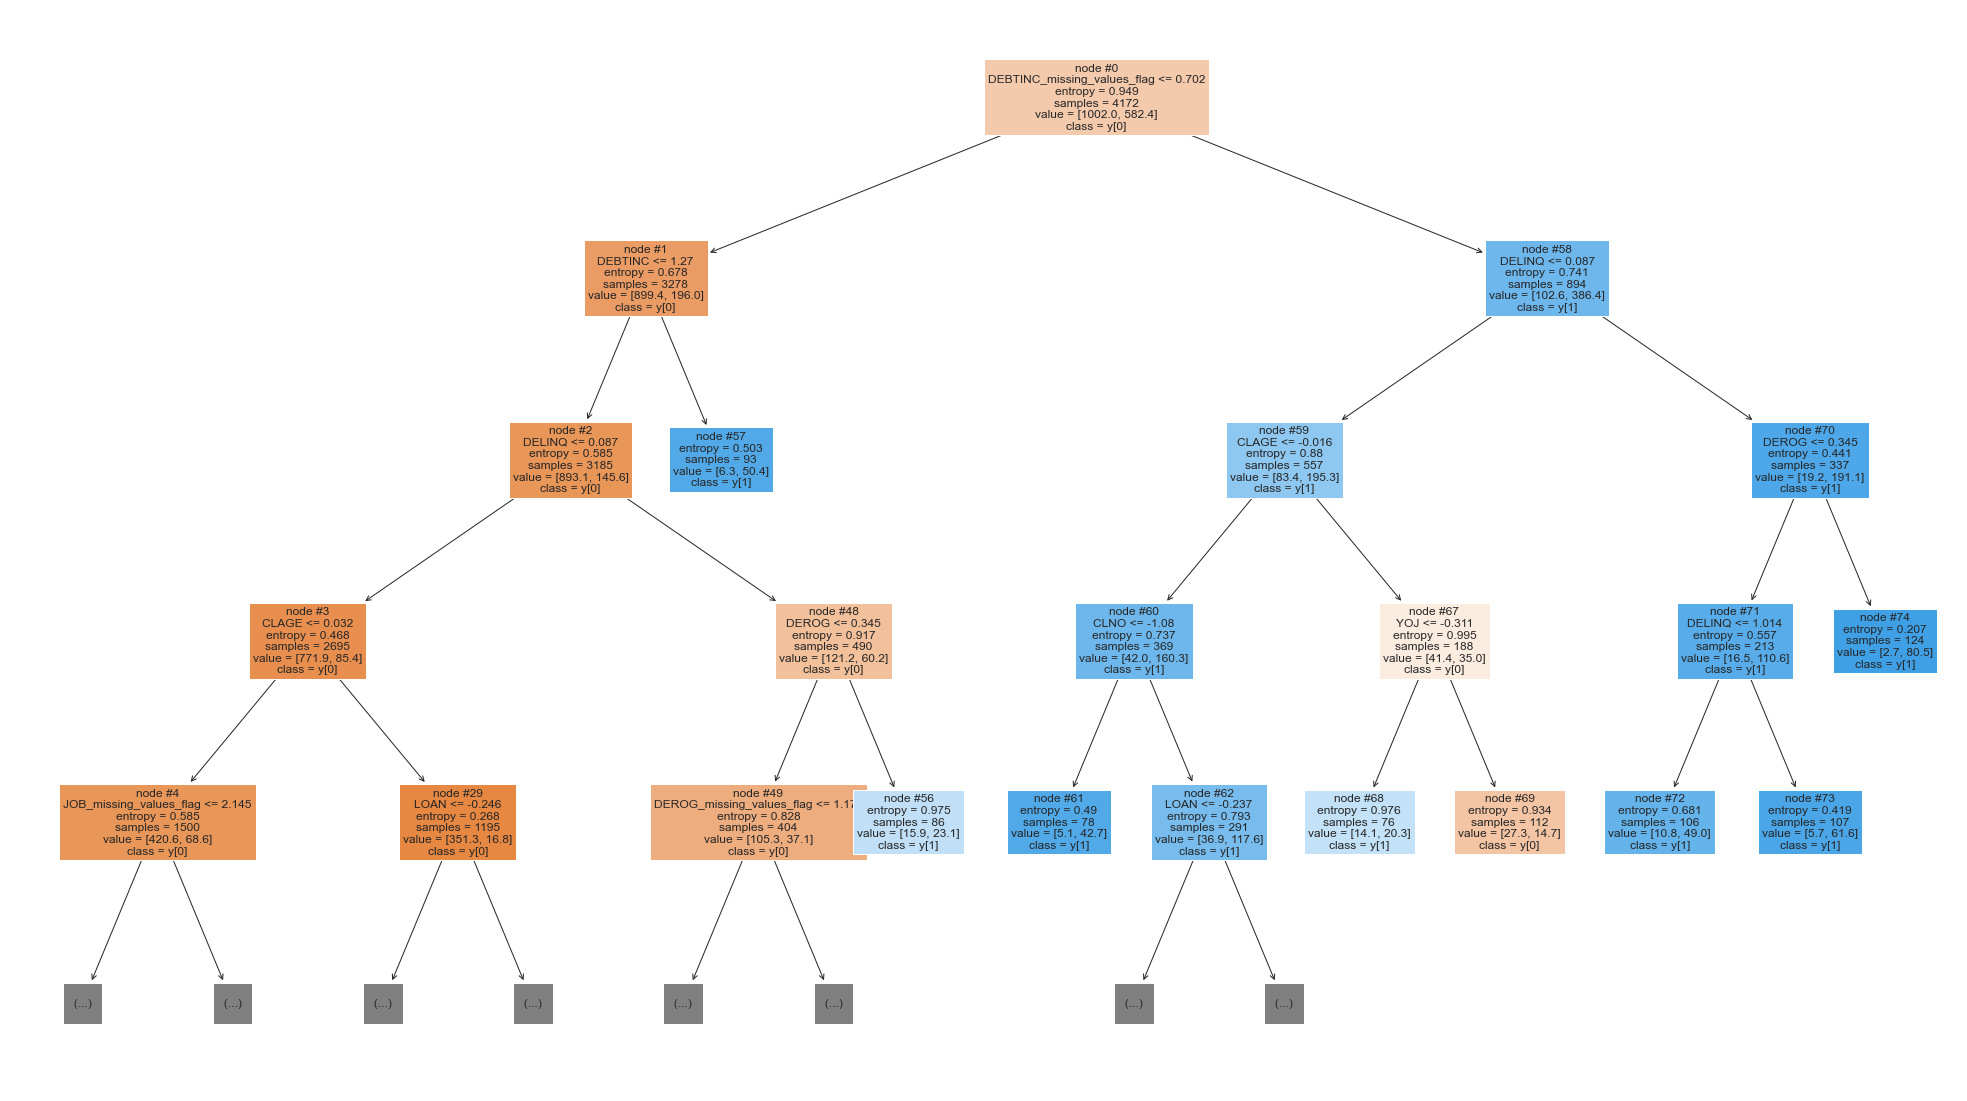

In [104]:
# Plotting the Decision Tree

#setting max depth at 4 as depth 11 is tough to visualise
features = list(X.columns)

plt.figure(figsize = (35, 20))

tree.plot_tree(dtree_estimator, max_depth = 4, feature_names = features, filled = True, fontsize = 12, node_ids = True, class_names = True)

plt.show()

**Observations:**

Blue leaves represent the defaulted applicants, i.e., y[1], while the orange leaves represent the repaid loan applicants, i.e., y[0]. Also, the more the number of observations in a leaf, the darker its color gets.

The first split is at debtinc missing flag which implies that its the one of the most important factors in deciding whether the applicant will default or not. Applicants who had a debtinc missing flag and have delinq <=0.087 would mostly default.
The next important factor is age of the oldest credit line followed by mortdue, loan, mortdue missing flag, years on the job.

### **Building a Random Forest Classifier**

**Random Forest is a bagging algorithm where the base models are Decision Trees.** Samples are taken from the training data and on each sample a decision tree makes a prediction. 

**The results from all the decision trees are combined together and the final prediction is made using voting or averaging.**

In [105]:
# Defining Random forest CLassifier

rf_estimator = RandomForestClassifier(random_state = 1)

rf_estimator.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3340
           1       1.00      1.00      1.00       832

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



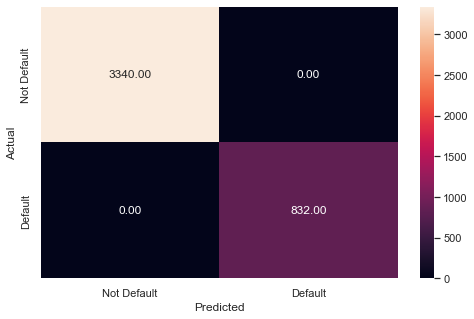

In [106]:
#Checking performance on the training data

y_pred_train_rf = rf_estimator.predict(X_train)

metrics_score(y_train, y_pred_train_rf)

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      1431
           1       0.84      0.68      0.75       357

    accuracy                           0.91      1788
   macro avg       0.88      0.82      0.85      1788
weighted avg       0.91      0.91      0.91      1788



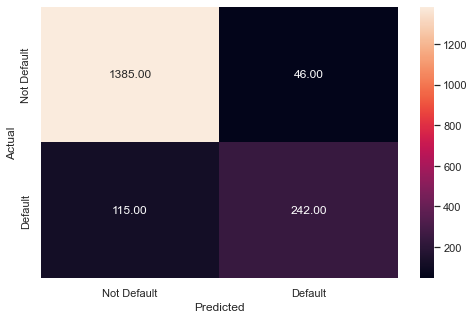

In [107]:
# Checking performance on the test data

y_pred_test_rf = rf_estimator.predict(X_test)

metrics_score(y_test, y_pred_test_rf)

**Observations:**
Similar to the decision tree, the random forest is giving a perfect performance on the training data.
The model is overfitting to the training dataset as we observed for the decision tree.

### **Build a Random Forest model with Class Weights**

In [108]:
# Defining Random Forest model with class weights class_weight={0: 0.2, 1: 0.8}

rf_estimator1 = RandomForestClassifier(class_weight={0: 0.2, 1: 0.8}, criterion='entropy',random_state =1
                       )

# Fitting Random Forest model

rf_estimator1.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.2, 1: 0.8}, criterion='entropy',
                       random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3340
           1       1.00      1.00      1.00       832

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



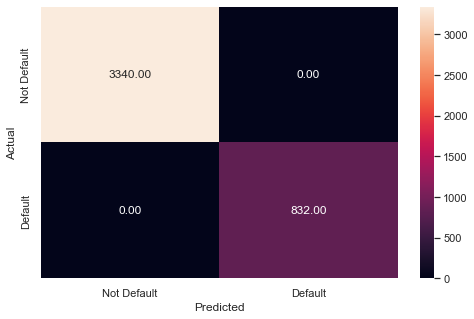

In [109]:
# Checking performance on the train data

y_pred_train_rf1 = rf_estimator1.predict(X_train)

metrics_score(y_train, y_pred_train_rf1)

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      1431
           1       0.83      0.65      0.73       357

    accuracy                           0.90      1788
   macro avg       0.87      0.81      0.83      1788
weighted avg       0.90      0.90      0.90      1788



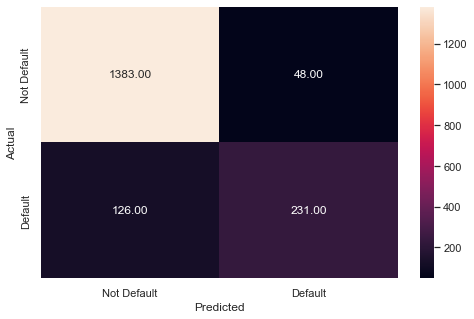

In [110]:
# Checking performance on the test data

y_pred_test_rf1 = rf_estimator1.predict(X_test)

metrics_score(y_test, y_pred_test_rf1)

### **Tuning the Random Forest**

* Hyperparameter tuning is tricky in the sense that **there is no direct way to calculate how a change in the hyperparameter value will reduce the loss of your model**, so we usually resort to experimentation. We'll use Grid search to perform hyperparameter tuning.
* **Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.** 
* **It is an exhaustive search** that is performed on the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are **optimized by cross-validated grid-search** over a parameter grid.


**n_estimators**: The number of trees in the forest.

**min_samples_split**: The minimum number of samples required to split an internal node:

**min_samples_leaf**: The minimum number of samples required to be at a leaf node. 

**max_features{“auto”, “sqrt”, “log2”, 'None'}**: The number of features to consider when looking for the best split.

- If “auto”, then max_features=sqrt(n_features).

- If “sqrt”, then max_features=sqrt(n_features) (same as “auto”).

- If “log2”, then max_features=log2(n_features).

- If None, then max_features=n_features.

You can learn more about Random Forest Hyperparameters from the link given below and try to tune them

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [111]:
# Choose the type of classifier. 

rf_estimator_tuned = RandomForestClassifier(class_weight ={0:0.2,1:0.8},random_state = 1, criterion ='entropy')

# Grid of parameters to choose from

parameters = {"n_estimators": [50,80,100],
              "min_samples_leaf": [15,20,25,30],
    "max_features": ["log2", "sqrt", "None"],
              'max_depth':np.arange(2, 12)
             }

# Type of scoring used to compare parameter combinations

scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search

grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring = scorer, cv = 10)


#fit the GridSearch on train dataset

grid_obj = grid_obj.fit(X_train, y_train)


# Set the clf to the best combination of parameters

rf_estimator_tuned = grid_obj.best_estimator_


# Fit the best algorithm to the data. 
rf_estimator_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.2, 1: 0.8}, criterion='entropy',
                       max_depth=11, min_samples_leaf=20, n_estimators=50,
                       random_state=1)

              precision    recall  f1-score   support

           0       0.96      0.89      0.92      3340
           1       0.65      0.84      0.73       832

    accuracy                           0.88      4172
   macro avg       0.81      0.86      0.83      4172
weighted avg       0.90      0.88      0.88      4172



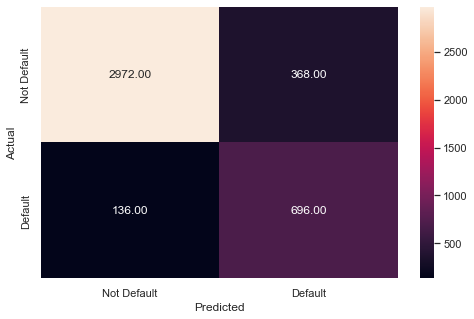

In [112]:
# Checking performance on the training data

y_pred_train_rf2 = rf_estimator_tuned.predict(X_train)

metrics_score(y_train, y_pred_train_rf2)

              precision    recall  f1-score   support

           0       0.94      0.89      0.92      1431
           1       0.64      0.78      0.70       357

    accuracy                           0.87      1788
   macro avg       0.79      0.83      0.81      1788
weighted avg       0.88      0.87      0.87      1788



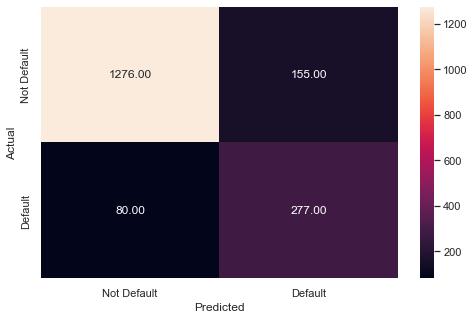

In [113]:
# Checking performace on test dataset

y_pred_test_rf2 = rf_estimator_tuned.predict(X_test)

metrics_score(y_test, y_pred_test_rf2)

#### Plot the Feature importance of the tuned Random Forest

<AxesSubplot:xlabel='Importance'>

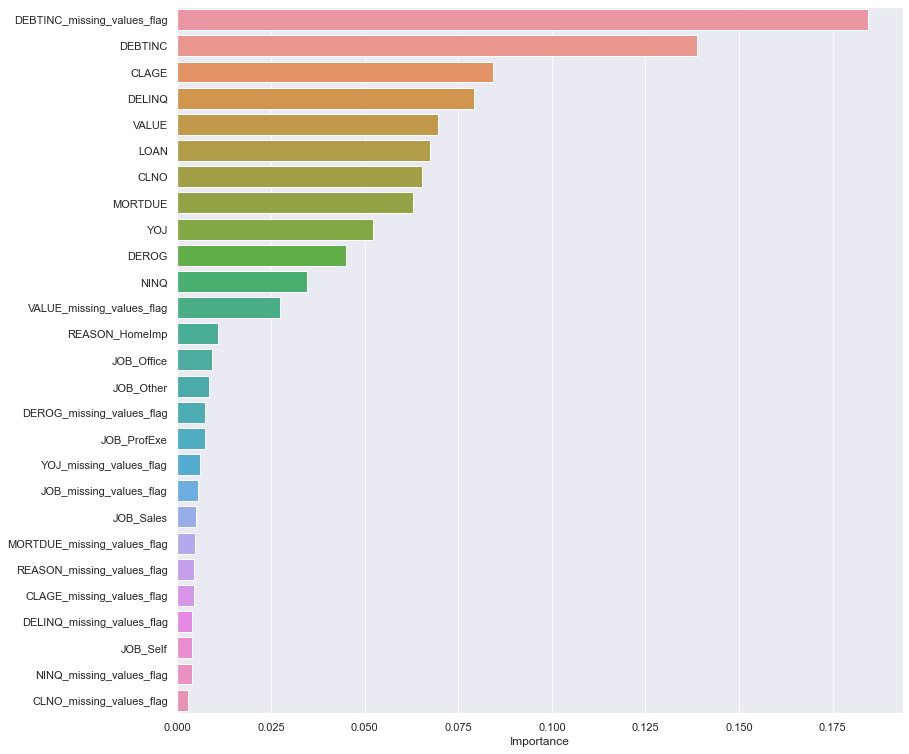

In [114]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

importances = rf_estimator.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(importance_df.Importance, importance_df.index)

**Observations**
The most important factors influencing are Debtinc missing flag followed but debtinc,clage, delinq, value. The model is providing importances to almost all the factors and hence indicates it overfitting by learning all the noise instead of generalising on the dataset. 

## **Boosting Models**

Let's now look at the other kind of Ensemble technique knowns as Boosting

### **ADABOOST CLASSIFIER**

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      3340
           1       0.94      0.83      0.88       832

    accuracy                           0.95      4172
   macro avg       0.95      0.91      0.93      4172
weighted avg       0.95      0.95      0.95      4172



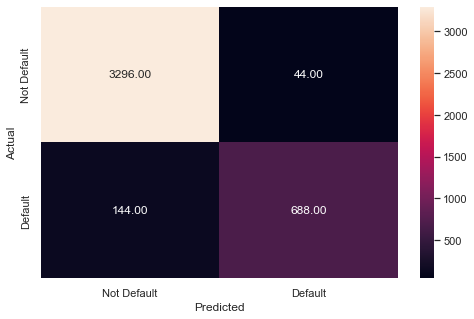

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      1431
           1       0.86      0.65      0.74       357

    accuracy                           0.91      1788
   macro avg       0.89      0.81      0.84      1788
weighted avg       0.91      0.91      0.91      1788



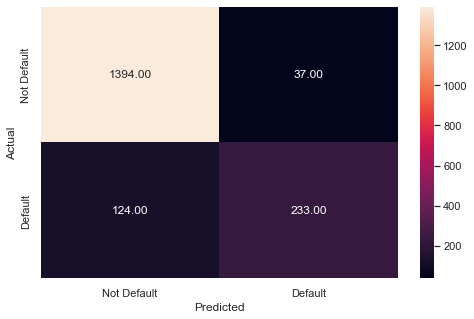

In [115]:
# XGBoost Classifier
xgb = XGBClassifier(eval_metric ='auc',random_state = 1,max_depth =3)

# Fitting the model
xgb.fit(X_train,y_train)

y_pred_train_xgb = xgb.predict(X_train)

metrics_score(y_train, y_pred_train_xgb)

# Checking performance on the test data

y_pred_test_xgb = xgb.predict(X_test)

metrics_score(y_test, y_pred_test_xgb)

In [116]:
xgb_tuned = XGBClassifier(eval_metric='auc',random_state =1)

param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,20,2)
}
scorer = metrics.make_scorer(recall_score, pos_label = 1)
gsearch1 = GridSearchCV(estimator =xgb_tuned, param_grid = param_test1, scoring=scorer,n_jobs=4, cv=5)
gridCV = gsearch1.fit(X_train, y_train)
xgb_tuned = gridCV.best_estimator_
xgb_tuned.fit(X_train, y_train)

# Fitting the model
xgb_tuned.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='auc', gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=7, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, ...)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3340
           1       1.00      1.00      1.00       832

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



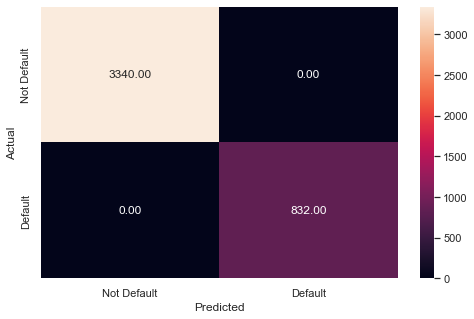

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      1431
           1       0.88      0.71      0.79       357

    accuracy                           0.92      1788
   macro avg       0.91      0.84      0.87      1788
weighted avg       0.92      0.92      0.92      1788



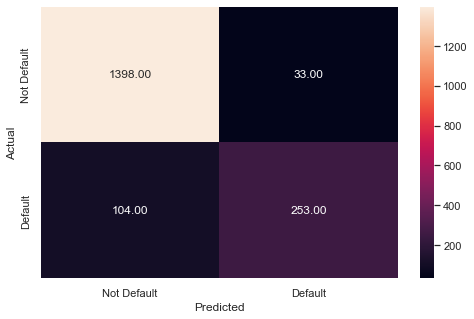

In [117]:
# Checking performance on the train data

y_pred_train_xgbtuned = xgb_tuned.predict(X_train)

metrics_score(y_train, y_pred_train_xgbtuned)

# Checking performance on the test data

y_pred_test_xgbtuned = xgb_tuned.predict(X_test)

metrics_score(y_test, y_pred_test_xgbtuned)

### **Comparing Model Performances**

In [118]:
def get_recall_score(model,flag=True,X_train=X_train,X_test=X_test):
    '''
    model : classifier to predict values of X

    '''
    a = [] # defining an empty list to store train and test results
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    a.append(train_recall) # adding train recall to list 
    a.append(test_recall) # adding test recall to list
    
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
    
    return a # returning the list with train and test scores

In [119]:
##  Function to calculate precision score
def get_precision_score(model,flag=True,X_train=X_train,X_test=X_test):
    '''
    model : classifier to predict values of X

    '''
    b = []  # defining an empty list to store train and test results
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    b.append(train_precision) # adding train precision to list
    b.append(test_precision) # adding test precision to list
    
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))

    return b # returning the list with train and test scores

In [120]:
##  Function to calculate accuracy score
def get_accuracy_score(model,flag=True,X_train=X_train,X_test=X_test):
    '''
    model : classifier to predict values of X

    '''
    c = [] # defining an empty list to store train and test results
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    c.append(train_acc) # adding train accuracy to list
    c.append(test_acc) # adding test accuracy to list
    
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True:
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
    
    return c # returning the list with train and test scores

In [121]:
##  Function to calculate F1 score
def get_f1_score(model,flag=True,X_train=X_train,X_test=X_test):
    '''
    model : classifier to predict values of X

    '''
    d = [] # defining an empty list to store train and test results
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    train_f1 = metrics.f1_score(y_train, pred_train)
    test_f1 = metrics.f1_score(y_test, pred_test)
    d.append(train_f1) # adding train accuracy to list
    d.append(test_f1) # adding test accuracy to list
    
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True:
        print("F1_score on training set : ",metrics.f1_score(y_train, pred_train))
        print("F1_score on test set : ",metrics.f1_score(y_test, pred_test))
    
    return d # returning the list with train and test scores

In [122]:
def get_roc_auc_score(model,flag=True,X_train=X_train,X_test=X_test):
    '''
    model : classifier to predict values of X

    '''
    e = [] # defining an empty list to store train and test results
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    train_roc_auc = metrics.roc_auc_score(y_train,pred_train)
    test_roc_auc = metrics.roc_auc_score(y_test,pred_test)
    e.append(train_roc_auc) # adding train recall to list 
    e.append(test_roc_auc) # adding test recall to list
    
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Roc_auc on training set : ",metrics.roc_auc_score(y_train,pred_train))
        print("Roc_auc on test set : ",metrics.roc_auc_score(y_test,pred_test))
    
    return e # returning the list with train and test scores

              precision    recall  f1-score   support

           0       0.94      0.90      0.92      3340
           1       0.66      0.78      0.71       832

    accuracy                           0.88      4172
   macro avg       0.80      0.84      0.82      4172
weighted avg       0.89      0.88      0.88      4172



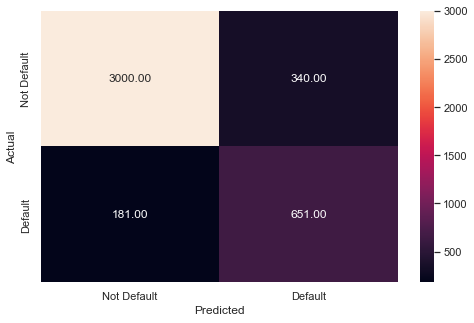

              precision    recall  f1-score   support

           0       0.94      0.92      0.93      1431
           1       0.70      0.75      0.72       357

    accuracy                           0.88      1788
   macro avg       0.82      0.83      0.82      1788
weighted avg       0.89      0.88      0.89      1788



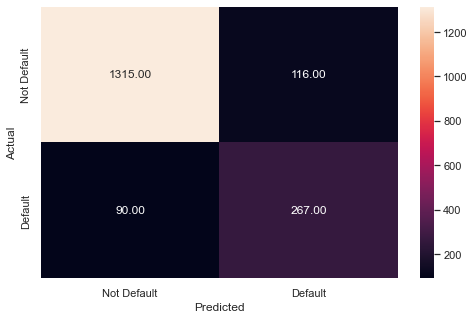

In [123]:
from sklearn.ensemble import VotingClassifier

model = VotingClassifier(estimators=[('lr', lg_wt),('dt',dtree_estimator),('QDA',qda)], voting ='soft',weights=[5,1,2])

model.fit(X_train,y_train)

# Checking performance on the training data
y_pred_train_model = model.predict(X_train)

metrics_score(y_train, y_pred_train_model)

# Checking performance on the test data

y_pred_test_model = model.predict(X_test)

metrics_score(y_test, y_pred_test_model)

The model has generalised on both the testing and training datasets and has provided better precision scores compared to the individual models,along with good recall scores and little overfitting

In [124]:
# Make the list of all the model names 

#models = [lda, qda]
models =[knn,knn_estimator,rf_estimator_tuned,rf_estimator1, rf_estimator,dtree_estimator,dt,lg, lg_wt, lg_estimator,lda, qda,xgb,xgb_tuned,svm,svm_tuned,model]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
F1_train =[]
F1_test =[]
ROC_train =[]
ROC_test =[]


# looping through all the models to get the accuracy,recall and precision scores
for model in models:
     # accuracy score
    j = get_accuracy_score(model,False)
    acc_train.append(j[0])
    acc_test.append(j[1])

    # recall score
    k = get_recall_score(model,False)
    recall_train.append(k[0])
    recall_test.append(k[1])

    # precision score
    l = get_precision_score(model,False)
    precision_train.append(l[0])
    precision_test.append(l[1])
    
    # F1 score
    m = get_f1_score(model,False)
    F1_train.append(m[0])
    F1_test.append(m[1])
    
    # ROC score
    n = get_roc_auc_score(model,False)
    ROC_train.append(n[0])
    ROC_test.append(n[1])


In [125]:
# Mention the Model names in the list. for example 'Model': ['Decision Tree', 'Tuned Decision Tree'..... write tht names of all model built]


comparison_frame = pd.DataFrame({'Model':['KNN','Tuned KNN','Tuned Random Forest','Random Forest Weighted','Random Forest','Tuned Decision Tree','Decision Tree','Logistic Regression','Log. Regression with Class Wts','Tuned Log.Regression','LDA','QDA','XGBoost','xgboost_tuned','SVM','SVM_Tuned','Voting classifier'], 
                                          'Train_Accuracy': acc_train,
                                          'Test_Accuracy': acc_test,
                                          'Train_Recall': recall_train,
                                          'Test_Recall': recall_test,
                                          'Train_Precision': precision_train,
                                          'Test_Precision': precision_test,
                                          'Train_F1' :F1_train,
                                          'Test_F1':F1_test,
                                'Train_ROC_AUC':ROC_train,
                                'Test_ROC_AUC':ROC_test}) 
comparison_frame.round(2)

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1,Test_F1,Train_ROC_AUC,Test_ROC_AUC
0,KNN,0.94,0.89,0.78,0.57,0.92,0.82,0.84,0.67,0.88,0.77
1,Tuned KNN,0.95,0.89,0.75,0.50,0.98,0.92,0.85,0.65,0.87,0.74
2,Tuned Random Forest,0.88,0.87,0.84,0.78,0.65,0.64,0.73,0.70,0.86,0.83
3,Random Forest Weighted,1.00,0.90,1.00,0.65,1.00,0.83,1.00,0.73,1.00,0.81
4,Random Forest,1.00,0.91,1.00,0.68,1.00,0.84,1.00,0.75,1.00,0.82
5,Tuned Decision Tree,0.88,0.87,0.76,0.71,0.66,0.66,0.71,0.68,0.83,0.81
6,Decision Tree,1.00,0.88,1.00,0.66,1.00,0.73,1.00,0.70,1.00,0.80
7,Logistic Regression,0.89,0.89,0.63,0.57,0.80,0.81,0.70,0.67,0.79,0.77
8,Log. Regression with Class Wts,0.87,0.87,0.81,0.78,0.63,0.64,0.71,0.70,0.84,0.83
9,Tuned Log.Regression,0.86,0.87,0.81,0.78,0.62,0.63,0.70,0.70,0.84,0.83


The models that had good recall scores were the logistic regression, hyperparameter tuned logistic regression, tuned decision tree, tuned random forests & SVM model. The KNN models had very low k values and were extremely overfit with low recall values. The tuned decision tree and random forest models were slightly overfit with decent precision scores. Both the models were performing better on the training data compared to the testing data. The logistic regression model with class weights and the tuned logistic regression both had similar performance metrics and had generalized on both the training & testing data. The LDA & QDA models had better precision scores than recall. QDA had better precision scores on the testing data compared to the training data.